In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

In [2]:
files = [
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-07-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-08-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-09-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-10-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-11-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2021-12-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-01-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-02-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-03-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-04-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-05-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-06-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-07-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-08-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-09-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-10-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-11-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2022-12-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-01-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-02-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-03-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-04-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-05-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-06-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-07-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-08-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-09-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-10-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-11-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2023-12-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-01-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-02-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-03-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-04-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-05-west-midlands-street.csv',
    'data/4c42761313a81f3dcf992ce34ef1411c97956eab/2024-06-west-midlands-street.csv',
]

# Read and concatenate all CSV files into a single DataFrame
dfs = [pd.read_csv(file) for file in files]
combined_crime_df = pd.concat(dfs, ignore_index=True)




combined_crime_df.head()

Crime ID    Month  \
0                                                NaN  2021-07   
1                                                NaN  2021-07   
2  e87e37613a5c8eb3a361806f1d0dcf8979568f9c76518d...  2021-07   
3  efdd4cad1601d4656ad97915b6b7f5489c5755b60f5a96...  2021-07   
4  0d696badd4234a45d92a398228ef7a43cdd70de1386139...  2021-07   

            Reported by          Falls within  Longitude   Latitude  \
0  West Midlands Police  West Midlands Police  -1.850056  52.591108   
1  West Midlands Police  West Midlands Police  -1.850772  52.588691   
2  West Midlands Police  West Midlands Police  -1.840641  52.598270   
3  West Midlands Police  West Midlands Police  -1.840641  52.598270   
4  West Midlands Police  West Midlands Police  -1.841944  52.597265   

                       Location  LSOA code        LSOA name  \
0       On or near Walsall Road  E01009417  Birmingham 001A   
1    On or near Seymour Gardens  E01009417  Birmingham 001A   
2  On or near Badgers Bank Road  E01009418  Birmingham 001B   
3  On or near Badgers Bank Road  E01009418  Birmingham 001B   
4      On or near Chelsea Drive  E01009418  Birmingham 001B   

                     Crime type  \
0         Anti-social behaviour   
1         Anti-social behaviour   
2                 Vehicle crime   
3                 Vehicle crime   
4  Violence and sexual offences   

                           Last outcome category  Context  
0                                            NaN      NaN  
1                                            NaN      NaN  
2  Investigation complete; no suspect identified      NaN  
3  Investigation complete; no suspect identified      NaN  
4                    Unable to prosecute suspect      NaN

In [3]:
gdf_crime = gpd.GeoDataFrame(combined_crime_df, 
      geometry=gpd.points_from_xy(combined_crime_df.Longitude, combined_crime_df.Latitude, crs='epsg:4326'))

In [4]:
#gdf_crime = gdf_crime[gdf_crime['Crime type'] == 'Anti-social behaviour']

In [5]:
gdf_crime = gdf_crime.to_crs('epsg:27700')

In [6]:
incidents = pd.read_excel("WMFS_datasets/wmfs_incidents.xlsx")

In [7]:
incidents.head()

call_time             incident_classification_label  \
0 2009-01-01 00:00:39       False alarm raised with good intent   
1 2009-01-01 00:10:45                            Secondary fire   
2 2009-01-01 00:11:59  False alarm raised with malicious intent   
3 2009-01-01 00:53:02                            Secondary fire   
4 2009-01-01 00:52:13  False alarm raised with malicious intent   

                              incident_profile_label  \
0                                       False Alarms   
1  Secondary Fires that attract a 20 minute-respo...   
2                                       False Alarms   
3  Secondary Fires that attract a 20 minute-respo...   
4                                       False Alarms   

  incident_classification_level1  prl_count  brv_count       EASTINGS  \
0                    FALSE_ALARM          2          0  392062.102010   
1                           FIRE          1          0  405643.149442   
2                    FALSE_ALARM          1          0  410260.244387   
3                           FIRE          1          0  396779.250331   
4                    FALSE_ALARM          1          0  410667.961350   

       NORTHINGS  call_seconds  reaction_seconds  driving_seconds  
0  286844.969007            86               160              250  
1  277939.980158            85                65              239  
2  288819.189377            62               106              115  
3  299030.106069            72               109               96  
4  290492.478579            68               109              204

In [8]:
incidents.tail()

call_time                   incident_classification_label  \
383663 2023-12-31 23:11:53             False alarm raised with good intent   
383664 2023-12-31 23:32:10                       Accidental secondary fire   
383665 2023-12-31 23:34:28  Water incident (flooding, leaks, rescues etc.)   
383666 2023-12-31 23:49:50                        False Alarms (Equipment)   
383667 2023-12-31 23:49:06                        False Alarms (Equipment)   

                                   incident_profile_label  \
383663                                       False Alarms   
383664  Secondary Fires that attract a 20 minute-respo...   
383665                                           Low Risk   
383666                                           Low Risk   
383667                                           Low Risk   

       incident_classification_level1  prl_count  brv_count       EASTINGS  \
383663                    FALSE_ALARM          1          1  433136.867808   
383664                           FIRE          0          1  401134.330416   
383665                            SSC          1          0  392245.881187   
383666                    FALSE_ALARM          0          1  406221.058730   
383667                    FALSE_ALARM          2          1  416529.495310   

            NORTHINGS  call_seconds  reaction_seconds  driving_seconds  
383663  277909.030728           134                94               98  
383664  277356.681953           136               152              227  
383665  283026.990442           119                88              307  
383666  290654.181612           253                66              297  
383667  285651.690157           218                71              177

去掉了false alarm


In [9]:
incidents_without_false = incidents[incidents['incident_classification_level1'] != 'FALSE_ALARM']
incidents_without_false.head()

call_time incident_classification_label  \
1 2009-01-01 00:10:45                Secondary fire   
3 2009-01-01 00:53:02                Secondary fire   
6 2009-01-01 01:42:42                Secondary fire   
8 2009-01-01 02:01:19                Secondary fire   
9 2009-01-01 02:17:19                Secondary fire   

                              incident_profile_label  \
1  Secondary Fires that attract a 20 minute-respo...   
3  Secondary Fires that attract a 20 minute-respo...   
6  Secondary Fires that attract a 20 minute-respo...   
8  Secondary Fires that attract a 20 minute-respo...   
9  Secondary Fires that attract a 20 minute-respo...   

  incident_classification_level1  prl_count  brv_count       EASTINGS  \
1                           FIRE          1          0  405643.149442   
3                           FIRE          1          0  396779.250331   
6                           FIRE          1          0  407818.504783   
8                           FIRE          1          0  397030.771939   
9                           FIRE          1          0  412657.702196   

       NORTHINGS  call_seconds  reaction_seconds  driving_seconds  
1  277939.980158            85                65              239  
3  299030.106069            72               109               96  
6  293843.351844            52                67              169  
8  299223.632489           263                50               47  
9  283014.575554            76                69              366

In [10]:
mobilisations = pd.read_excel("WMFS_datasets/wmfs_mobilisations.xlsx")

In [11]:
mobilisations.tail()

Incident_Number resource_callsign callsign_type           call_time  \
596305           418542              B025           BRV 2024-04-30 22:58:02   
596306           418543              B021           PRL 2024-04-30 23:04:19   
596307           418544              E051           PRL 2024-04-30 23:15:21   
596308           418545              E031           PRL 2024-04-30 23:20:49   
596309           418546              A065           BRV 2024-04-30 23:56:31   

       callsign_station        initial_incident_type  \
596305          Sheldon                          RTC   
596306          Sheldon  ALARMS SLEEPING NON MANAGED   
596307    Wolverhampton      TALL BUILDING FIRE wmfs   
596308       Willenhall             SMELL OF BURNING   
596309         Ward End                     FLOODING   

              incident_classification_label incident_profile_label  \
596305               Road Traffic Collision               Low Risk   
596306             False Alarms (Equipment)               Low Risk   
596307  False alarm raised with good intent           False Alarms   
596308             False Alarms (Equipment)           False Alarms   
596309  False alarm raised with good intent           False Alarms   

       incident_classification_level1  call_seconds  reaction_seconds  \
596305                            RTC            89                54   
596306                    FALSE_ALARM            56                32   
596307                    FALSE_ALARM            99                70   
596308                    FALSE_ALARM           103                62   
596309                    FALSE_ALARM           128                63   

        driving_seconds  on_scene_seconds       EASTINGS      NORTHINGS  
596305              239              1015  414944.640891  285379.736160  
596306              392               614  418412.097253  286150.692386  
596307              264              1043  388245.301595  296765.439120  
596308              690              3968  390846.562049  299197.927681  
596309              284              3209  411221.969554  287201.914216

In [12]:
false_alarms = mobilisations[mobilisations['incident_classification_label'] == 'False Alarms (Equipment)']
false_alarm_ratio = len(false_alarms) / 596309 * 100

In [13]:
false_alarm_ratio

22.565817386623376

In [14]:
mobilisations.head()

Incident_Number resource_callsign callsign_type           call_time  \
0                2              E091           PRL 2009-04-01 00:17:57   
1                3              E062           PRL 2009-04-01 01:19:42   
2                4              A031           PRL 2009-04-01 02:38:52   
3                5              E021           PRL 2009-04-01 03:06:46   
4                6              B052           PRL 2009-04-01 04:00:16   

   callsign_station         initial_incident_type  \
0        Wednesbury  FLOODING AFFECTING ELECTRICS   
1     Fallings Park                           AFA   
2  Sutton Coldfield                    HOUSE FIRE   
3          Bloxwich                      CAR FIRE   
4         Foleshill                  VEHICLE FIRE   

                    incident_classification_label incident_profile_label  \
0  Water incident (flooding, leaks, rescues etc.)            Medium Risk   
1                        False Alarms (Equipment)               Low Risk   
2                       Deliberate Dwelling Fires              High Risk   
3                    Accidental fire in a vehicle            Medium Risk   
4                        Deliberate Vehicle Fires            Medium Risk   

  incident_classification_level1  call_seconds  reaction_seconds  \
0                            SSC            72                90   
1                    FALSE_ALARM            83               107   
2                           FIRE            60                59   
3                           FIRE            77               178   
4                           FIRE            39               156   

   driving_seconds  on_scene_seconds       EASTINGS      NORTHINGS  
0              357              2675  396626.647792  293398.274929  
1              137               301  392467.761616  300729.971951  
2              243              1604  414032.026461  295718.208726  
3              298              3683  402125.999466  304036.435988  
4              143              1039  434018.738385  283292.799430

In [15]:

Deliberate_fires = mobilisations[mobilisations['incident_classification_label'].str.contains('Deliberate ', case=False)]
Deliberate_fires_ratio = len(Deliberate_fires) / 596309 * 100
Deliberate_fires_ratio

13.798383053081539

In [16]:
gdf_incidents = gpd.GeoDataFrame(mobilisations, 
      geometry=gpd.points_from_xy(mobilisations.EASTINGS, mobilisations.NORTHINGS, crs='epsg:27700'))

In [17]:
gdf_incidents.head()

Incident_Number resource_callsign callsign_type           call_time  \
0                2              E091           PRL 2009-04-01 00:17:57   
1                3              E062           PRL 2009-04-01 01:19:42   
2                4              A031           PRL 2009-04-01 02:38:52   
3                5              E021           PRL 2009-04-01 03:06:46   
4                6              B052           PRL 2009-04-01 04:00:16   

   callsign_station         initial_incident_type  \
0        Wednesbury  FLOODING AFFECTING ELECTRICS   
1     Fallings Park                           AFA   
2  Sutton Coldfield                    HOUSE FIRE   
3          Bloxwich                      CAR FIRE   
4         Foleshill                  VEHICLE FIRE   

                    incident_classification_label incident_profile_label  \
0  Water incident (flooding, leaks, rescues etc.)            Medium Risk   
1                        False Alarms (Equipment)               Low Risk   
2                       Deliberate Dwelling Fires              High Risk   
3                    Accidental fire in a vehicle            Medium Risk   
4                        Deliberate Vehicle Fires            Medium Risk   

  incident_classification_level1  call_seconds  reaction_seconds  \
0                            SSC            72                90   
1                    FALSE_ALARM            83               107   
2                           FIRE            60                59   
3                           FIRE            77               178   
4                           FIRE            39               156   

   driving_seconds  on_scene_seconds       EASTINGS      NORTHINGS  \
0              357              2675  396626.647792  293398.274929   
1              137               301  392467.761616  300729.971951   
2              243              1604  414032.026461  295718.208726   
3              298              3683  402125.999466  304036.435988   
4              143              1039  434018.738385  283292.799430   

                        geometry  
0  POINT (396626.648 293398.275)  
1  POINT (392467.762 300729.972)  
2  POINT (414032.026 295718.209)  
3  POINT (402125.999 304036.436)  
4  POINT (434018.738 283292.799)

In [18]:
gdf_incidents_without_false = gdf_incidents[gdf_incidents['incident_classification_level1'] != 'FALSE_ALARM']
gdf_incidents_without_false.head()

Incident_Number resource_callsign callsign_type           call_time  \
0                2              E091           PRL 2009-04-01 00:17:57   
2                4              A031           PRL 2009-04-01 02:38:52   
3                5              E021           PRL 2009-04-01 03:06:46   
4                6              B052           PRL 2009-04-01 04:00:16   
5                6              B051           PRL 2009-04-01 04:00:16   

   callsign_station         initial_incident_type  \
0        Wednesbury  FLOODING AFFECTING ELECTRICS   
2  Sutton Coldfield                    HOUSE FIRE   
3          Bloxwich                      CAR FIRE   
4         Foleshill                  VEHICLE FIRE   
5         Foleshill                  VEHICLE FIRE   

                    incident_classification_label incident_profile_label  \
0  Water incident (flooding, leaks, rescues etc.)            Medium Risk   
2                       Deliberate Dwelling Fires              High Risk   
3                    Accidental fire in a vehicle            Medium Risk   
4                        Deliberate Vehicle Fires            Medium Risk   
5                        Deliberate Vehicle Fires            Medium Risk   

  incident_classification_level1  call_seconds  reaction_seconds  \
0                            SSC            72                90   
2                           FIRE            60                59   
3                           FIRE            77               178   
4                           FIRE            39               156   
5                           FIRE            39               138   

   driving_seconds  on_scene_seconds       EASTINGS      NORTHINGS  \
0              357              2675  396626.647792  293398.274929   
2              243              1604  414032.026461  295718.208726   
3              298              3683  402125.999466  304036.435988   
4              143              1039  434018.738385  283292.799430   
5              142              1891  434018.738385  283292.799430   

                        geometry  
0  POINT (396626.648 293398.275)  
2  POINT (414032.026 295718.209)  
3  POINT (402125.999 304036.436)  
4  POINT (434018.738 283292.799)  
5  POINT (434018.738 283292.799)

In [19]:
gdf_incidents_without_false = gdf_incidents_without_false[gdf_incidents_without_false['incident_classification_label'].str.contains('fire|Fire|fires|Fires|FIRE|FIRES', case=False)]

In [20]:
gdf_incidents_without_false.tail()

Incident_Number resource_callsign callsign_type           call_time  \
596281           418525              E015           BRV 2024-04-30 19:25:29   
596284           418528              A075           BRV 2024-04-30 19:28:53   
596286           418530              C015           BRV 2024-04-30 19:54:13   
596295           418535              C015           BRV 2024-04-30 21:02:15   
596299           418538              B041           PRL 2024-04-30 21:57:35   

       callsign_station initial_incident_type  \
596281          Walsall        SECONDARY FIRE   
596284       Handsworth        SECONDARY FIRE   
596286         Highgate        SECONDARY FIRE   
596295         Highgate        SECONDARY FIRE   
596299           Canley              CAR FIRE   

                            incident_classification_label  \
596281  Secondary fire resulting from deliberately set...   
596284                            Accidental rubbish fire   
596286                            Accidental rubbish fire   
596295                            Accidental rubbish fire   
596299                           Deliberate Vehicle Fires   

                                   incident_profile_label  \
596281  Secondary Fires that attract a 20 minute-respo...   
596284  Secondary Fires that attract a 20 minute-respo...   
596286  Secondary Fires that attract a 20 minute-respo...   
596295  Secondary Fires that attract a 20 minute-respo...   
596299                                        Medium Risk   

       incident_classification_level1  call_seconds  reaction_seconds  \
596281                           FIRE            73                71   
596284                           FIRE           103                81   
596286                           FIRE            58                23   
596295                           FIRE            38                19   
596299                           FIRE            60                49   

        driving_seconds  on_scene_seconds       EASTINGS      NORTHINGS  \
596281              332              1370  398458.313814  299473.444850   
596284              772               801  403276.050706  295128.647019   
596286              422               833  410229.068635  283243.936396   
596295              520               227  407035.675683  286979.445453   
596299              175              2586  429828.368835  277453.154734   

                             geometry  
596281  POINT (398458.314 299473.445)  
596284  POINT (403276.051 295128.647)  
596286  POINT (410229.069 283243.936)  
596295  POINT (407035.676 286979.445)  
596299  POINT (429828.369 277453.155)

In [21]:
station = pd.read_csv("WMFS_datasets/station_locations.csv")

In [22]:
station

Station name  Easting  Northing  PRL_Count  BRV_Count Closed (Y/N)  \
0           Aldridge   405203    302818          1          0            N   
1              Aston   407316    289711          1          1            N   
2         Bickenhill   419627    284038          1          0            N   
3          Billesley   409029    281369          1          1            N   
4            Bilston   394543    296040          1          0            N   
5             Binley   436876    278691          1          1            N   
6           Bloxwich   399846    301797          1          0            N   
7         Bournbrook   405167    283287          1          0            N   
8      Brierley Hill   391862    287775          1          1            N   
9             Canley   430542    277280          1          0            N   
10          Coventry   433026    279453          2          0            N   
11     Cradley Heath   395460    286326          0          0            Y   
12            Dudley   392914    291534          1          1            N   
13         Erdington   411277    292051          1          0            N   
14     Fallings Park   393074    300673          1          1            N   
15         Foleshill   434545    282370          1          1            N   
16       Haden Cross   395946    285731          1          1            N   
17         Halesowen   395366    282656          0          0            Y   
18        Handsworth   404124    289867          1          1            N   
19         Hay Mills   411478    284683          1          1            N   
20          Highgate   407895    285024          2          0            N   
21      Kings Norton   404865    279690          1          0            N   
22          Ladywood   404983    286788          1          1            N   
23        Northfield   401796    278838          1          1            N   
24           Oldbury   399022    288393          1          1            N   
25        Perry Barr   408405    293078          1          1            N   
26           Sheldon   414991    286606          1          1            N   
27         Smethwick   401805    288545          1          0            N   
28          Solihull   414377    279802          1          1            N   
29       Stourbridge   390368    284156          1          0            N   
30  Sutton Coldfield   412078    296747          1          0            N   
31        Tettenhall   388415    300090          1          0            N   
32            Tipton   396494    292683          1          0            N   
33           Walsall   400789    298890          2          0            N   
34          Ward End   411296    288549          1          1            N   
35        Wednesbury   398425    294968          1          0            N   
36     West Bromwich   400485    291813          1          1            N   
37        Willenhall   397381    299387          1          0            N   
38     Wolverhampton   390873    297977          1          1            N   
39   Woodgate Valley   401587    283003          1          0            N   

                 Opened      Closed  
0   Before study period         NaN  
1   Before study period         NaN  
2   Before study period         NaN  
3   Before study period         NaN  
4   Before study period         NaN  
5   Before study period         NaN  
6   Before study period         NaN  
7   Before study period         NaN  
8   Before study period         NaN  
9   Before study period         NaN  
10  Before study period         NaN  
11  Before study period  04/08/2014  
12  Before study period         NaN  
13  Before study period         NaN  
14  Before study period         NaN  
15  Before study period         NaN  
16           04/08/2014         NaN  
17  Before study period  01/04/2012  
18  Before study period         NaN  
19  Before study period         NaN  
20  Before 

In [23]:
gdf_station = gpd.GeoDataFrame(station, 
      geometry=gpd.points_from_xy(station.Easting, station.Northing, crs='epsg:27700'))

In [24]:
gdf_incident = gpd.GeoDataFrame(incidents, 
      geometry=gpd.points_from_xy(incidents.EASTINGS, incidents.NORTHINGS, crs='epsg:27700'))

In [25]:
LSOA = gpd.read_file('data/Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BFC_V10_-3788374532542394575.geojson')

In [26]:
LSOA.head()

FID   LSOA21CD                   LSOA21NM LSOA21NMW   BNG_E   BNG_N  \
0    1  E01000001        City of London 001A            532123  181632   
1    2  E01000002        City of London 001B            532480  181715   
2    3  E01000003        City of London 001C            532239  182033   
3    4  E01000005        City of London 001E            533581  181283   
4    5  E01000006  Barking and Dagenham 016A            544994  184274   

        LAT      LONG                              GlobalID  \
0  51.51817 -0.097150  c625aea8-6d73-4b2a-be76-4d5c44cad9f8   
1  51.51883 -0.091970  52c878e9-ac68-4886-b4a8-fea9cd241a70   
2  51.52174 -0.095330  b9d8faca-d489-478d-8ce6-acaf76186d7d   
3  51.51469 -0.076280  15e1417d-537c-4845-9820-fc7596bd59b0   
4  51.53875  0.089317  8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0   

                                            geometry  
0  POLYGON ((532151.537 181867.433, 532152.500 18...  
1  POLYGON ((532634.497 181926.016, 532632.048 18...  
2  POLYGON ((532153.703 182165.155, 532158.250 18...  
3  POLYGON ((533619.062 181402.364, 533639.868 18...  
4  POLYGON ((545126.852 184310.838, 545145.213 18...

In [27]:
counties = [
    'Birmingham', 'Coventry', 'Dudley', 'Sandwell', 
    'Solihull', 'Walsall', 'Wolverhampton'
]


LSOA_west_midlands_county = LSOA[LSOA['LSOA21NM'].str.contains('|'.join(counties))]

In [28]:
LSOA_west_midlands_county.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
8449  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
8450  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
8451  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
8452  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
8453  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

         LONG                              GlobalID  \
8449 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
8450 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
8451 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
8452 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
8453 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                               geometry  
8449  POLYGON ((413033.000 285817.000, 413036.000 28...  
8450  POLYGON ((411787.206 285679.513, 411803.091 28...  
8451  POLYGON ((412227.697 285391.500, 412228.570 28...  
8452  POLYGON ((411934.831 285273.169, 411932.794 28...  
8453  POLYGON ((413380.303 284868.362, 413404.313 28...

In [29]:
LSOA_west_midlands_county.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
32945  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
32946  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
32947  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
32948  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
32949  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

          LONG                              GlobalID  \
32945 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
32946 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
32947 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
32948 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
32949 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                                geometry  
32945  POLYGON ((406293.107 287694.662, 406295.234 28...  
32946  POLYGON ((410436.781 284511.999, 410538.000 28...  
32947  POLYGON ((409830.548 284037.548, 409846.450 28...  
32948  POLYGON ((410467.090 283937.633, 410475.000 28...  
32949  POLYGON ((410668.336 283368.743, 410673.208 28...

c:\Users\17197\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


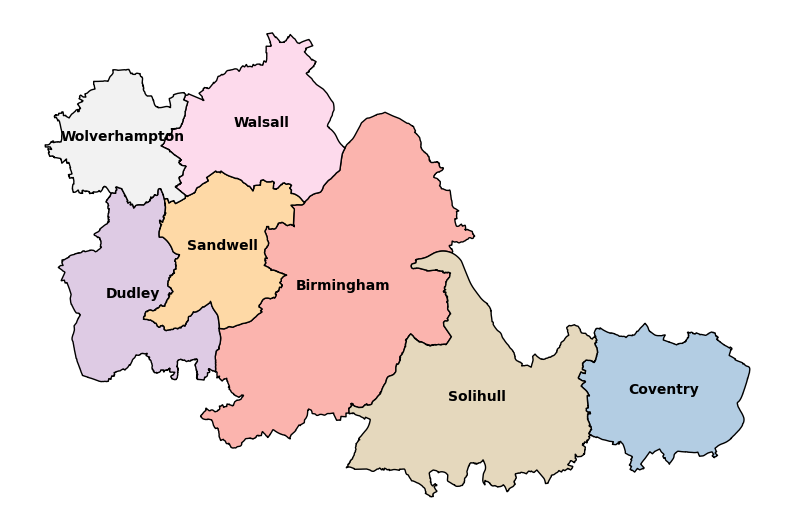

In [30]:
# Convert to GeoDataFrame
gdf_map = LSOA_west_midlands_county

# Extract the base name (e.g., "Birmingham") by splitting the LSOA name
gdf_map['base_name'] = gdf_map['LSOA21NM'].str.split().str[0]

# Group by the base name and merge polygons
gdf_merged = gdf_map.dissolve(by='base_name', aggfunc='sum')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))

# Since base_name is now the index, use the index for coloring
gdf_merged.plot(ax=ax, cmap='Pastel1', edgecolor='black', legend=True)

# Customize the map appearance

ax.set_axis_off()  # Hide axis

# Add labels to the merged areas
for idx, row in gdf_merged.iterrows():
    plt.annotate(text=idx, xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=10, color='black', weight='bold')

plt.show()

In [31]:
lsoa_age = pd.read_csv("data/lsoa_age.csv")

In [32]:
lsoa_age.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008881                Birmingham 067A   
4                           E01008881                Birmingham 067A   
5                           E01008881                Birmingham 067A   
6                           E01008882                Birmingham 066A   
7                           E01008882                Birmingham 066A   
8                           E01008882                Birmingham 066A   
9                           E01008882                Birmingham 066A   

   Age (6 categories) Code       Age (6 categories)  Observation  
0                        1  Aged 15 years and under          425  
1                        2      Aged 16 to 24 years          231  
2                        3      Aged 25 to 34 years          271  
3                        4      Aged 35 to 49 years          315  
4                        5      Aged 50 to 64 years          271  
5                        6   Aged 65 years and over          233  
6                        1  Aged 15 years and under          614  
7                        2      Aged 16 to 24 years          265  
8                        3      Aged 25 to 34 years          298  
9                        4      Aged 35 to 49 years          431

In [33]:
result_age = lsoa_age.groupby("Lower layer Super Output Areas Code")["Observation"].sum().reset_index()
result_age.head()

Lower layer Super Output Areas Code  Observation
0                           E01008881         1746
1                           E01008882         2055
2                           E01008883         1999
3                           E01008884         2209
4                           E01008885         1352

In [34]:
lsoa_age =lsoa_age[lsoa_age['Age (6 categories)'] == 'Aged 65 years and over']

In [35]:
lsoa_age.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
5                            E01008881                Birmingham 067A   
11                           E01008882                Birmingham 066A   
17                           E01008883                Birmingham 078A   
23                           E01008884                Birmingham 078B   
29                           E01008885                Birmingham 076A   

    Age (6 categories) Code      Age (6 categories)  Observation  
5                         6  Aged 65 years and over          233  
11                        6  Aged 65 years and over          176  
17                        6  Aged 65 years and over          190  
23                        6  Aged 65 years and over          155  
29                        6  Aged 65 years and over          206

In [36]:
lsoa_merge = LSOA_west_midlands_county.merge(lsoa_age, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')

In [37]:
lsoa_merge.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry   base_name  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  Birmingham   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  Birmingham   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  Birmingham   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  Birmingham   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  Birmingham   

     Lower layer Super Output Areas Code Lower layer Super Output Areas  \
1714                           E01034951                Birmingham 137G   
1715                           E01034952                Birmingham 142B   
1716                           E01034953                Birmingham 142C   
1717                           E01034954                Birmingham 143A   
1718                           E01034955                Birmingham 143B   

      Age (6 categories) Code      Age (6 categories)  Observation  
1714                        6  Aged 65 years and over           41  
1715                        6  Aged 65 years and over           77  
1716                        6  Aged 65 years and over          136  
1717                        6  Aged 65 years and over          120  
1718                        6  Aged 65 years and over          127

In [38]:
from pandas import NA


lsoa_merge_NA =lsoa_merge[lsoa_merge['Observation'] == NA]

In [39]:
lsoa_merge_NA.head(10)

Empty GeoDataFrame
Columns: [FID, LSOA21CD, LSOA21NM, LSOA21NMW, BNG_E, BNG_N, LAT, LONG, GlobalID, geometry, base_name, Lower layer Super Output Areas Code, Lower layer Super Output Areas, Age (6 categories) Code, Age (6 categories), Observation]
Index: []

In [40]:
lsoa_merge['Age_65+'] = lsoa_merge['Observation']

In [41]:
lsoa_merge.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry   base_name  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  Birmingham   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  Birmingham   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  Birmingham   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  Birmingham   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  Birmingham   

     Lower layer Super Output Areas Code Lower layer Super Output Areas  \
1714                           E01034951                Birmingham 137G   
1715                           E01034952                Birmingham 142B   
1716                           E01034953                Birmingham 142C   
1717                           E01034954                Birmingham 143A   
1718                           E01034955                Birmingham 143B   

      Age (6 categories) Code      Age (6 categories)  Observation  Age_65+  
1714                        6  Aged 65 years and over           41       41  
1715                        6  Aged 65 years and over           77       77  
1716                        6  Aged 65 years and over          136      136  
1717                        6  Aged 65 years and over          120      120  
1718                        6  Aged 65 years and over          127      127

In [42]:
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)
lsoa_merge.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry   base_name  Age_65+  
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  Birmingham       41  
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  Birmingham       77  
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  Birmingham      136  
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  Birmingham      120  
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  Birmingham      127

In [43]:
lsoa_merge = lsoa_merge.merge(result_age, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

  Lower layer Super Output Areas Code  Observation  
0                           E01008881         1746  
1                           E01008882         2055  
2                           E01008883         1999  
3                           E01008884         2209  
4                           E01008885         1352

In [44]:
lsoa_merge['population'] = lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-3:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  
0        1746  
1        2055  
2        1999  
3        2209  
4        1352

This definition of a disabled person meets the harmonised standard for measuring disability and is in line with the Equality Act (2010).
Add or remove variable

In [45]:
lsoa_disability = pd.read_csv("data/lsoa_disability.csv")

In [46]:
lsoa_disability.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008882                Birmingham 066A   
4                           E01008882                Birmingham 066A   

   Disability (3 categories) Code            Disability (3 categories)  \
0                              -8                       Does not apply   
1                               1      Disabled under the Equality Act   
2                               2  Not disabled under the Equality Act   
3                              -8                       Does not apply   
4                               1      Disabled under the Equality Act   

   Observation  
0            0  
1          297  
2         1448  
3            0  
4          335

In [47]:
lsoa_disability = lsoa_disability[lsoa_disability["Disability (3 categories)"] == 'Disabled under the Equality Act']
lsoa_disability.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
1                            E01008881                Birmingham 067A   
4                            E01008882                Birmingham 066A   
7                            E01008883                Birmingham 078A   
10                           E01008884                Birmingham 078B   
13                           E01008885                Birmingham 076A   

    Disability (3 categories) Code        Disability (3 categories)  \
1                                1  Disabled under the Equality Act   
4                                1  Disabled under the Equality Act   
7                                1  Disabled under the Equality Act   
10                               1  Disabled under the Equality Act   
13                               1  Disabled under the Equality Act   

    Observation  
1           297  
4           335  
7           345  
10          323  
13          189

In [48]:
lsoa_disability.tail(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
10693                           E01035074        Telford and Wrekin 009G   
10696                           E01035075        Telford and Wrekin 009H   
10699                           E01035076        Telford and Wrekin 024A   
10702                           E01035077        Telford and Wrekin 024B   
10705                           E01035078        Telford and Wrekin 024D   
10708                           E01035079        Telford and Wrekin 025A   
10711                           E01035080        Telford and Wrekin 025B   
10714                           E01035081        Telford and Wrekin 025C   
10717                           E01035082        Telford and Wrekin 025D   
10720                           E01035083        Telford and Wrekin 025E   

       Disability (3 categories) Code        Disability (3 categories)  \
10693                               1  Disabled under the Equality Act   
10696                               1  Disabled under the Equality Act   
10699                               1  Disabled under the Equality Act   
10702                               1  Disabled under the Equality Act   
10705                               1  Disabled under the Equality Act   
10708                               1  Disabled under the Equality Act   
10711                               1  Disabled under the Equality Act   
10714                               1  Disabled under the Equality Act   
10717                               1  Disabled under the Equality Act   
10720                               1  Disabled under the Equality Act   

       Observation  
10693          240  
10696          143  
10699          173  
10702          300  
10705          225  
10708          171  
10711          182  
10714          219  
10717          397  
10720          343

In [49]:
lsoa_disability[lsoa_disability['Lower layer Super Output Areas'] == 'Birmingham 067A']


Lower layer Super Output Areas Code Lower layer Super Output Areas  \
1                           E01008881                Birmingham 067A   

   Disability (3 categories) Code        Disability (3 categories)  \
1                               1  Disabled under the Equality Act   

   Observation  
1          297

In [50]:
lsoa_merge = lsoa_merge.merge(lsoa_disability, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry   base_name  Age_65+  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  Birmingham       41   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  Birmingham       77   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  Birmingham      136   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  Birmingham      120   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  Birmingham      127   

      population Lower layer Super Output Areas Code  \
1714        1107                           E01034951   
1715        1290                           E01034952   
1716        1618                           E01034953   
1717        1733                           E01034954   
1718        2149                           E01034955   

     Lower layer Super Output Areas  Disability (3 categories) Code  \
1714                Birmingham 137G                               1   
1715                Birmingham 142B                               1   
1716                Birmingham 142C                               1   
1717                Birmingham 143A                               1   
1718                Birmingham 143B                               1   

            Disability (3 categories)  Observation  
1714  Disabled under the Equality Act          121  
1715  Disabled under the Equality Act          190  
1716  Disabled under the Equality Act          210  
1717  Disabled under the Equality Act          239  
1718  Disabled under the Equality Act          282

In [51]:
lsoa_merge["disability"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  
0        1746         297  
1        2055         335  
2        1999         345  
3        2209         323  
4        1352         189

In [52]:
sjoin_lsoa = gpd.sjoin(gdf_incidents_without_false, lsoa_merge)
count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
lsoa_merge['incidents_count'] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  
0        1746         297              140  
1        2055         335              209  
2        1999         345              205  
3        2209         323              420  
4        1352         189               46

In [53]:
lsoa_merge.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry   base_name  Age_65+  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  Birmingham       41   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  Birmingham       77   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  Birmingham      136   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  Birmingham      120   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  Birmingham      127   

      population  disability  incidents_count  
1714        1107         121              150  
1715        1290         190              261  
1716        1618         210              147  
1717        1733         239               98  
1718        2149         282              326

In [54]:
lsoa_eco = pd.read_csv("data/lsoa_Economic_activity.csv")
lsoa_eco.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008881                Birmingham 067A   
4                           E01008881                Birmingham 067A   
5                           E01008881                Birmingham 067A   
6                           E01008881                Birmingham 067A   
7                           E01008882                Birmingham 066A   
8                           E01008882                Birmingham 066A   
9                           E01008882                Birmingham 066A   

   Economic activity status (7 categories) Code  \
0                                            -8   
1                                             1   
2                                             2   
3                                             3   
4                                             4   
5                                             5   
6                                             6   
7                                            -8   
8                                             1   
9                                             2   

             Economic activity status (7 categories)  Observation  
0                                     Does not apply          425  
1  Economically active (excluding full-time stude...          626  
2  Economically active (excluding full-time stude...           68  
3  Economically active and a full-time student: I...           49  
4  Economically active and a full-time student: U...           11  
5  Economically inactive (excluding full-time stu...          458  
6      Economically inactive and a full-time student          106  
7                                     Does not apply          614  
8  Economically active (excluding full-time stude...          627  
9  Economically active (excluding full-time stude...           68

In [55]:
a= lsoa_eco['Economic activity status (7 categories)'].to_list()
a

['Does not apply',
 'Economically active (excluding full-time students): In employment',
 'Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks',
 'Economically active and a full-time student: In employment',
 'Economically active and a full-time student: Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks',
 'Economically inactive (excluding full-time students)',
 'Economically inactive and a full-time student',
 'Does not apply',
 'Economically active (excluding full-time students): In employment',
 'Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks',
 'Economically active and a full-time student: In employment',
 'Economically active and a full-time student: Unemployed: Seeking work or waiting to start a j

In [56]:
lsoa_deprivation = pd.read_csv("data/lsoa_household_deprivation.csv")

In [57]:
lsoa_deprivation.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008881                Birmingham 067A   
4                           E01008881                Birmingham 067A   
5                           E01008881                Birmingham 067A   
6                           E01008882                Birmingham 066A   
7                           E01008882                Birmingham 066A   
8                           E01008882                Birmingham 066A   
9                           E01008882                Birmingham 066A   

   Household deprivation (6 categories) Code  \
0                                         -8   
1                                          1   
2                                          2   
3                                          3   
4                                          4   
5                                          5   
6                                         -8   
7                                          1   
8                                          2   
9                                          3   

         Household deprivation (6 categories)  Observation  
0                              Does not apply            0  
1  Household is not deprived in any dimension          198  
2      Household is deprived in one dimension          206  
3     Household is deprived in two dimensions          144  
4   Household is deprived in three dimensions           34  
5    Household is deprived in four dimensions            2  
6                              Does not apply            0  
7  Household is not deprived in any dimension          200  
8      Household is deprived in one dimension          235  
9     Household is deprived in two dimensions          168

In [58]:
lsoa_heating = pd.read_csv('data/lsoa_type_of_central_heating_in_household.csv')

In [59]:
lsoa_heating.head(15)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                            E01008881                Birmingham 067A   
1                            E01008881                Birmingham 067A   
2                            E01008881                Birmingham 067A   
3                            E01008881                Birmingham 067A   
4                            E01008881                Birmingham 067A   
5                            E01008881                Birmingham 067A   
6                            E01008881                Birmingham 067A   
7                            E01008881                Birmingham 067A   
8                            E01008881                Birmingham 067A   
9                            E01008881                Birmingham 067A   
10                           E01008881                Birmingham 067A   
11                           E01008881                Birmingham 067A   
12                           E01008881                Birmingham 067A   
13                           E01008882                Birmingham 066A   
14                           E01008882                Birmingham 066A   

    Type of central heating in household (13 categories) Code  \
0                                                  -9           
1                                                   1           
2                                                   2           
3                                                   3           
4                                                   4           
5                                                   5           
6                                                   6           
7                                                   7           
8                                                   8           
9                                                   9           
10                                                 10           
11                                                 11           
12                                                 12           
13                                                 -9           
14                                                  1           

   Type of central heating in household (13 categories)  Observation  
0                                      Does not apply              0  
1                                  No central heating             16  
2                                      Mains gas only            481  
3                            Tank or bottled gas only              4  
4                                       Electric only             22  
5                                            Oil only              0  
6                                           Wood only              0  
7                                     Solid fuel only              0  
8                               Renewable energy only              0  
9             District or communal heat networks only              0  
10                         Other central heating only             15  
11  Two or more types of central heating (not incl...             44  
12  Two or more types of central heating (includin...              1  
13                                     Does not apply              0  
14                                 No central heating             15

In [60]:
lsoa_house_size = pd.read_csv("data/lsoa_Household_size.csv")
lsoa_house_size.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008881                Birmingham 067A   
4                           E01008881                Birmingham 067A   
5                           E01008882                Birmingham 066A   
6                           E01008882                Birmingham 066A   
7                           E01008882                Birmingham 066A   
8                           E01008882                Birmingham 066A   
9                           E01008882                Birmingham 066A   

   Household size (5 categories) Code  Household size (5 categories)  \
0                                   0          0 people in household   
1                                   1          1 person in household   
2                                   2          2 people in household   
3                                   3          3 people in household   
4                                   4  4 or more people in household   
5                                   0          0 people in household   
6                                   1          1 person in household   
7                                   2          2 people in household   
8                                   3          3 people in household   
9                                   4  4 or more people in household   

   Observation  
0            0  
1          148  
2          136  
3          102  
4          198  
5            0  
6          165  
7          139  
8          114  
9          255

In [61]:
lsoa_house_size_1person = lsoa_house_size[lsoa_house_size['Household size (5 categories)'] == '1 person in household']
lsoa_house_size_1person.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
1                            E01008881                Birmingham 067A   
6                            E01008882                Birmingham 066A   
11                           E01008883                Birmingham 078A   
16                           E01008884                Birmingham 078B   
21                           E01008885                Birmingham 076A   

    Household size (5 categories) Code Household size (5 categories)  \
1                                    1         1 person in household   
6                                    1         1 person in household   
11                                   1         1 person in household   
16                                   1         1 person in household   
21                                   1         1 person in household   

    Observation  
1           148  
6           165  
11          162  
16          179  
21          125

In [62]:
lsoa_merge = lsoa_merge.merge(lsoa_house_size_1person, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  \
0        1746         297              140   
1        2055         335              209   
2        1999         345              205   
3        2209         323              420   
4        1352         189               46   

  Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008882                Birmingham 066A   
2                           E01008883                Birmingham 078A   
3                           E01008884                Birmingham 078B   
4                           E01008885                Birmingham 076A   

   Household size (5 categories) Code Household size (5 categories)  \
0                                   1         1 person in household   
1                                   1         1 person in household   
2                                   1         1 person in household   
3                                   1         1 person in household   
4                                   1         1 person in household   

   Observation  
0          148  
1          165  
2          162  
3          179  
4          125

In [63]:
lsoa_merge["household_1person"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  
0        1746         297              140                148  
1        2055         335              209                165  
2        1999         345              205                162  
3        2209         323              420                179  
4        1352         189               46                125

In [64]:
result_household = lsoa_house_size.groupby("Lower layer Super Output Areas Code")["Observation"].sum().reset_index()
result_household.head()

Lower layer Super Output Areas Code  Observation
0                           E01008881          584
1                           E01008882          673
2                           E01008883          637
3                           E01008884          710
4                           E01008885          504

In [65]:
lsoa_merge = lsoa_merge.merge(result_household, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  \
0        1746         297              140                148   
1        2055         335              209                165   
2        1999         345              205                162   
3        2209         323              420                179   
4        1352         189               46                125   

  Lower layer Super Output Areas Code  Observation  
0                           E01008881          584  
1                           E01008882          673  
2                           E01008883          637  
3                           E01008884          710  
4                           E01008885          504

In [66]:
lsoa_merge["household"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-3:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  household  
0        1746         297              140                148        584  
1        2055         335              209                165        673  
2        1999         345              205                162        637  
3        2209         323              420                179        710  
4        1352         189               46                125        504

In [67]:
lsoa_education_deprivation = pd.read_csv("data/lsoa_Household_deprived_in_the_education_dimension.csv")
lsoa_education_deprivation.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008882                Birmingham 066A   
4                           E01008882                Birmingham 066A   
5                           E01008882                Birmingham 066A   
6                           E01008883                Birmingham 078A   
7                           E01008883                Birmingham 078A   
8                           E01008883                Birmingham 078A   
9                           E01008884                Birmingham 078B   

   Household deprived in the education dimension (3 categories) Code  \
0                                                 -8                   
1                                                  0                   
2                                                  1                   
3                                                 -8                   
4                                                  0                   
5                                                  1                   
6                                                 -8                   
7                                                  0                   
8                                                  1                   
9                                                 -8                   

  Household deprived in the education dimension (3 categories)  Observation  
0                                     Does not apply                      0  
1  Household is not deprived in the education dim...                    413  
2   Household is deprived in the education dimension                    171  
3                                     Does not apply                      0  
4  Household is not deprived in the education dim...                    446  
5   Household is deprived in the education dimension                    225  
6                                     Does not apply                      0  
7  Household is not deprived in the education dim...                    452  
8   Household is deprived in the education dimension                    185  
9                                     Does not apply                      0

In [68]:
lsoa_education_deprivation_filtered = lsoa_education_deprivation[lsoa_education_deprivation['Household deprived in the education dimension (3 categories)'] == 'Household is deprived in the education dimension']
lsoa_education_deprivation_filtered.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
2                            E01008881                Birmingham 067A   
5                            E01008882                Birmingham 066A   
8                            E01008883                Birmingham 078A   
11                           E01008884                Birmingham 078B   
14                           E01008885                Birmingham 076A   

    Household deprived in the education dimension (3 categories) Code  \
2                                                   1                   
5                                                   1                   
8                                                   1                   
11                                                  1                   
14                                                  1                   

   Household deprived in the education dimension (3 categories)  Observation  
2    Household is deprived in the education dimension                    171  
5    Household is deprived in the education dimension                    225  
8    Household is deprived in the education dimension                    185  
11   Household is deprived in the education dimension                    229  
14   Household is deprived in the education dimension                    126

In [69]:
lsoa_merge = lsoa_merge.merge(lsoa_education_deprivation_filtered, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... population  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...       1746   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...       2055   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...       1999   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...       2209   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...       1352   

   disability  incidents_count  household_1person  household  \
0         297              140                148        584   
1         335              209                165        673   
2         345              205                162        637   
3         323              420                179        710   
4         189               46                125        504   

   Lower layer Super Output Areas Code  Lower layer Super Output Areas  \
0                            E01008881                 Birmingham 067A   
1                            E01008882                 Birmingham 066A   
2                            E01008883                 Birmingham 078A   
3                            E01008884                 Birmingham 078B   
4                            E01008885                 Birmingham 076A   

  Household deprived in the education dimension (3 categories) Code  \
0                                                  1                  
1                                                  1                  
2                                                  1                  
3                                                  1                  
4                                                  1                  

  Household deprived in the education dimension (3 categories)  Observation  
0   Household is deprived in the education dimension                    171  
1   Household is deprived in the education dimension                    225  
2   Household is deprived in the education dimension                    185  
3   Household is deprived in the education dimension                    229  
4   Household is deprived in the education dimension                    126  

[5 rows x 22 columns]

In [70]:
lsoa_merge["household_education_dep"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  household  \
0        1746         297              140                148        584   
1        2055         335              209                165        673   
2        1999         345              205                162        637   
3        2209         323              420                179        710   
4        1352         189               46                125        504   

   household_education_dep  
0                      171  
1                      225  
2                      185  
3                      229  
4                      126

In [71]:
lsoa_employment_deprivation = pd.read_csv("data/lsoa_Household_deprived_in_the_employment_dimension.csv")
lsoa_employment_deprivation.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008882                Birmingham 066A   
4                           E01008882                Birmingham 066A   
5                           E01008882                Birmingham 066A   
6                           E01008883                Birmingham 078A   
7                           E01008883                Birmingham 078A   
8                           E01008883                Birmingham 078A   
9                           E01008884                Birmingham 078B   

   Household deprived in the employment dimension (3 categories) Code  \
0                                                 -8                    
1                                                  0                    
2                                                  1                    
3                                                 -8                    
4                                                  0                    
5                                                  1                    
6                                                 -8                    
7                                                  0                    
8                                                  1                    
9                                                 -8                    

  Household deprived in the employment dimension (3 categories)  Observation  
0                                     Does not apply                       0  
1  Household is not deprived in the employment di...                     477  
2  Household is deprived in the employment dimension                     107  
3                                     Does not apply                       0  
4  Household is not deprived in the employment di...                     519  
5  Household is deprived in the employment dimension                     151  
6                                     Does not apply                       0  
7  Household is not deprived in the employment di...                     487  
8  Household is deprived in the employment dimension                     150  
9                                     Does not apply                       0

In [72]:
lsoa_employment_deprivation_filtered = lsoa_employment_deprivation[lsoa_employment_deprivation['Household deprived in the employment dimension (3 categories)'] == 'Household is deprived in the employment dimension']
lsoa_employment_deprivation_filtered.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
2                            E01008881                Birmingham 067A   
5                            E01008882                Birmingham 066A   
8                            E01008883                Birmingham 078A   
11                           E01008884                Birmingham 078B   
14                           E01008885                Birmingham 076A   

    Household deprived in the employment dimension (3 categories) Code  \
2                                                   1                    
5                                                   1                    
8                                                   1                    
11                                                  1                    
14                                                  1                    

   Household deprived in the employment dimension (3 categories)  Observation  
2   Household is deprived in the employment dimension                     107  
5   Household is deprived in the employment dimension                     151  
8   Household is deprived in the employment dimension                     150  
11  Household is deprived in the employment dimension                     144  
14  Household is deprived in the employment dimension                      51

In [73]:
lsoa_merge = lsoa_merge.merge(lsoa_employment_deprivation_filtered, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... disability  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...        297   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...        335   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...        345   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...        323   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...        189   

   incidents_count  household_1person  household  household_education_dep  \
0              140                148        584                      171   
1              209                165        673                      225   
2              205                162        637                      185   
3              420                179        710                      229   
4               46                125        504                      126   

   Lower layer Super Output Areas Code  Lower layer Super Output Areas  \
0                            E01008881                 Birmingham 067A   
1                            E01008882                 Birmingham 066A   
2                            E01008883                 Birmingham 078A   
3                            E01008884                 Birmingham 078B   
4                            E01008885                 Birmingham 076A   

   Household deprived in the employment dimension (3 categories) Code  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  1                    
4                                                  1                    

  Household deprived in the employment dimension (3 categories) Observation  
0  Household is deprived in the employment dimension                    107  
1  Household is deprived in the employment dimension                    151  
2  Household is deprived in the employment dimension                    150  
3  Household is deprived in the employment dimension                    144  
4  Household is deprived in the employment dimension                     51  

[5 rows x 23 columns]

In [74]:
lsoa_merge["household_employment_dep"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  household  \
0        1746         297              140                148        584   
1        2055         335              209                165        673   
2        1999         345              205                162        637   
3        2209         323              420                179        710   
4        1352         189               46                125        504   

   household_education_dep  household_employment_dep  
0                      171                       107  
1                      225                       151  
2                      185                       150  
3                      229                       144  
4                      126                        51

In [75]:
lsoa_housing_deprivation = pd.read_csv("data/lsoa_Household_deprived_in_the_housing_dimension.csv")
lsoa_housing_deprivation.head(10)

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
0                           E01008881                Birmingham 067A   
1                           E01008881                Birmingham 067A   
2                           E01008881                Birmingham 067A   
3                           E01008882                Birmingham 066A   
4                           E01008882                Birmingham 066A   
5                           E01008882                Birmingham 066A   
6                           E01008883                Birmingham 078A   
7                           E01008883                Birmingham 078A   
8                           E01008883                Birmingham 078A   
9                           E01008884                Birmingham 078B   

   Household deprived in the housing dimension (3 categories) Code  \
0                                                 -8                 
1                                                  0                 
2                                                  1                 
3                                                 -8                 
4                                                  0                 
5                                                  1                 
6                                                 -8                 
7                                                  0                 
8                                                  1                 
9                                                 -8                 

  Household deprived in the housing dimension (3 categories)  Observation  
0                                     Does not apply                    0  
1  Household is not deprived in the housing dimen...                  495  
2     Household is deprived in the housing dimension                   88  
3                                     Does not apply                    0  
4  Household is not deprived in the housing dimen...                  546  
5     Household is deprived in the housing dimension                  125  
6                                     Does not apply                    0  
7  Household is not deprived in the housing dimen...                  526  
8     Household is deprived in the housing dimension                  111  
9                                     Does not apply                    0

In [76]:
lsoa_housing_deprivation_filtered = lsoa_housing_deprivation[lsoa_housing_deprivation['Household deprived in the housing dimension (3 categories)'] == 'Household is deprived in the housing dimension']
lsoa_housing_deprivation_filtered.head()

Lower layer Super Output Areas Code Lower layer Super Output Areas  \
2                            E01008881                Birmingham 067A   
5                            E01008882                Birmingham 066A   
8                            E01008883                Birmingham 078A   
11                           E01008884                Birmingham 078B   
14                           E01008885                Birmingham 076A   

    Household deprived in the housing dimension (3 categories) Code  \
2                                                   1                 
5                                                   1                 
8                                                   1                 
11                                                  1                 
14                                                  1                 

   Household deprived in the housing dimension (3 categories)  Observation  
2      Household is deprived in the housing dimension                   88  
5      Household is deprived in the housing dimension                  125  
8      Household is deprived in the housing dimension                  111  
11     Household is deprived in the housing dimension                   99  
14     Household is deprived in the housing dimension                   28

In [77]:
lsoa_merge = lsoa_merge.merge(lsoa_housing_deprivation_filtered, left_on = 'LSOA21CD',right_on='Lower layer Super Output Areas Code', how='left')
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... incidents_count  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...             140   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...             209   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...             205   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...             420   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...              46   

   household_1person  household  household_education_dep  \
0                148        584                      171   
1                165        673                      225   
2                162        637                      185   
3                179        710                      229   
4                125        504                      126   

   household_employment_dep  Lower layer Super Output Areas Code  \
0                       107                            E01008881   
1                       151                            E01008882   
2                       150                            E01008883   
3                       144                            E01008884   
4                        51                            E01008885   

   Lower layer Super Output Areas  \
0                 Birmingham 067A   
1                 Birmingham 066A   
2                 Birmingham 078A   
3                 Birmingham 078B   
4                 Birmingham 076A   

   Household deprived in the housing dimension (3 categories) Code  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   Household deprived in the housing dimension (3 categories) Observation  
0     Household is deprived in the housing dimension                   88  
1     Household is deprived in the housing dimension                  125  
2     Household is deprived in the housing dimension                  111  
3     Household is deprived in the housing dimension                   99  
4     Household is deprived in the housing dimension                   28  

[5 rows x 24 columns]

In [78]:
lsoa_merge["household_housing_dep"]= lsoa_merge['Observation']
lsoa_merge.drop(lsoa_merge.columns[-6:-1], axis=1, inplace=True)

lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry   base_name  Age_65+  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  Birmingham      233   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  Birmingham      176   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  Birmingham      190   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  Birmingham      155   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  Birmingham      206   

   population  disability  incidents_count  household_1person  household  \
0        1746         297              140                148        584   
1        2055         335              209                165        673   
2        1999         345              205                162        637   
3        2209         323              420                179        710   
4        1352         189               46                125        504   

   household_education_dep  household_employment_dep  household_housing_dep  
0                      171                       107                     88  
1                      225                       151                    125  
2                      185                       150                    111  
3                      229                       144                     99  
4                      126                        51                     28

In [79]:
crime_counts = gdf_crime.groupby('LSOA code').size().reset_index(name='crime_count')
crime_counts

LSOA code  crime_count
0     E01008881         1121
1     E01008882          647
2     E01008883          820
3     E01008884         1221
4     E01008885          399
...         ...          ...
1804  E01034951          379
1805  E01034952          154
1806  E01034953          149
1807  E01034954          108
1808  E01034955          190

[1809 rows x 2 columns]

In [80]:
#lsoa_merge = lsoa_merge.merge(crime_counts, left_on = 'LSOA21CD',right_on='LSOA code', how='left')

In [81]:
#lsoa_merge.drop(lsoa_merge.columns[-2:-1], axis=1, inplace=True)
#lsoa_merge.head()

In [82]:
sjoin_lsoa = gpd.sjoin(gdf_crime, lsoa_merge)
count_dict = sjoin_lsoa['LSOA21CD'].value_counts().to_dict() # count the values with value counts
lsoa_merge['crime_count'] = lsoa_merge['LSOA21CD'].map(count_dict) # map it back to lsoa
lsoa_merge.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... Age_65+  population  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...     233        1746   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...     176        2055   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...     190        1999   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...     155        2209   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...     206        1352   

   disability  incidents_count  household_1person  household  \
0         297              140                148        584   
1         335              209                165        673   
2         345              205                162        637   
3         323              420                179        710   
4         189               46                125        504   

   household_education_dep  household_employment_dep  household_housing_dep  \
0                      171                       107                     88   
1                      225                       151                    125   
2                      185                       150                    111   
3                      229                       144                     99   
4                      126                        51                     28   

   crime_count  
0         1072  
1          671  
2          820  
3         1177  
4          399  

[5 rows x 21 columns]

In [83]:
#drop NA
lsoa_merge_without_NA = lsoa_merge.dropna()
lsoa_merge_without_NA.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry  ... Age_65+  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  ...      41   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  ...      77   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  ...     136   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  ...     120   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  ...     127   

      population  disability  incidents_count  household_1person  household  \
1714        1107         121              150                242        599   
1715        1290         190              261                 83        407   
1716        1618         210              147                 54        408   
1717        1733         239               98                115        510   
1718        2149         282              326                 92        570   

      household_education_dep  household_employment_dep  \
1714                       71                        60   
1715                      113                        88   
1716                      123                        87   
1717                      123                        99   
1718                      169                       101   

      household_housing_dep  crime_count  
1714                     81          758  
1715                     90          439  
1716                     88          365  
1717                     82          426  
1718                    106          482  

[5 rows x 21 columns]

In [84]:
lsoa_merge_without_NA.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... Age_65+  population  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...     233        1746   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...     176        2055   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...     190        1999   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...     155        2209   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...     206        1352   

   disability  incidents_count  household_1person  household  \
0         297              140                148        584   
1         335              209                165        673   
2         345              205                162        637   
3         323              420                179        710   
4         189               46                125        504   

   household_education_dep  household_employment_dep  household_housing_dep  \
0                      171                       107                     88   
1                      225                       151                    125   
2                      185                       150                    111   
3                      229                       144                     99   
4                      126                        51                     28   

   crime_count  
0         1072  
1          671  
2          820  
3         1177  
4          399  

[5 rows x 21 columns]

In [85]:
lsoa_merge_without_NA['Incidents rate'] = lsoa_merge_without_NA['incidents_count']/lsoa_merge_without_NA['population']
lsoa_merge_without_NA['Age 65+ ratio'] = lsoa_merge_without_NA['Age_65+']/lsoa_merge_without_NA['population']
lsoa_merge_without_NA['Disability ratio'] = lsoa_merge_without_NA['disability']/lsoa_merge_without_NA['population']
lsoa_merge_without_NA['1 person in household ratio'] = lsoa_merge_without_NA['household_1person']/lsoa_merge_without_NA['household']
lsoa_merge_without_NA['Household deprived in education ratio'] = lsoa_merge_without_NA['household_education_dep']/lsoa_merge_without_NA['household']
lsoa_merge_without_NA['Household deprived in employment ratio'] = lsoa_merge_without_NA['household_employment_dep']/lsoa_merge_without_NA['household']
lsoa_merge_without_NA['Household deprived in housing ratio'] = lsoa_merge_without_NA['household_housing_dep']/lsoa_merge_without_NA['household']
lsoa_merge_without_NA['Crime rate'] = lsoa_merge_without_NA['crime_count']/lsoa_merge_without_NA['population']
lsoa_merge_without_NA.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry  ...  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  ...   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  ...   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  ...   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  ...   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  ...   

     household_housing_dep  crime_count  Incidents rate  Age 65+ ratio  \
1714                    81          758        0.135501       0.037037   
1715                    90          439        0.202326       0.059690   
1716                    88          365        0.090853       0.084054   
1717                    82          426        0.056549       0.069244   
1718                   106          482        0.151698       0.059097   

      Disability ratio  1 person in household ratio  \
1714          0.109304                     0.404007   
1715          0.147287                     0.203931   
1716          0.129790                     0.132353   
1717          0.137911                     0.225490   
1718          0.131224                     0.161404   

      Household deprived in education ratio  \
1714                               0.118531   
1715                               0.277641   
1716                               0.301471   
1717                               0.241176   
1718                               0.296491   

      Household deprived in employment ratio  \
1714                                0.100167   
1715                                0.216216   
1716                                0.213235   
1717                                0.194118   
1718                                0.177193   

      Household deprived in housing ratio  Crime rate  
1714                             0.135225    0.684734  
1715                             0.221130    0.340310  
1716                             0.215686    0.225587  
1717                             0.160784    0.245817  
1718                             0.185965    0.224290  

[5 rows x 29 columns]

# End of handling data
*****************************************************************

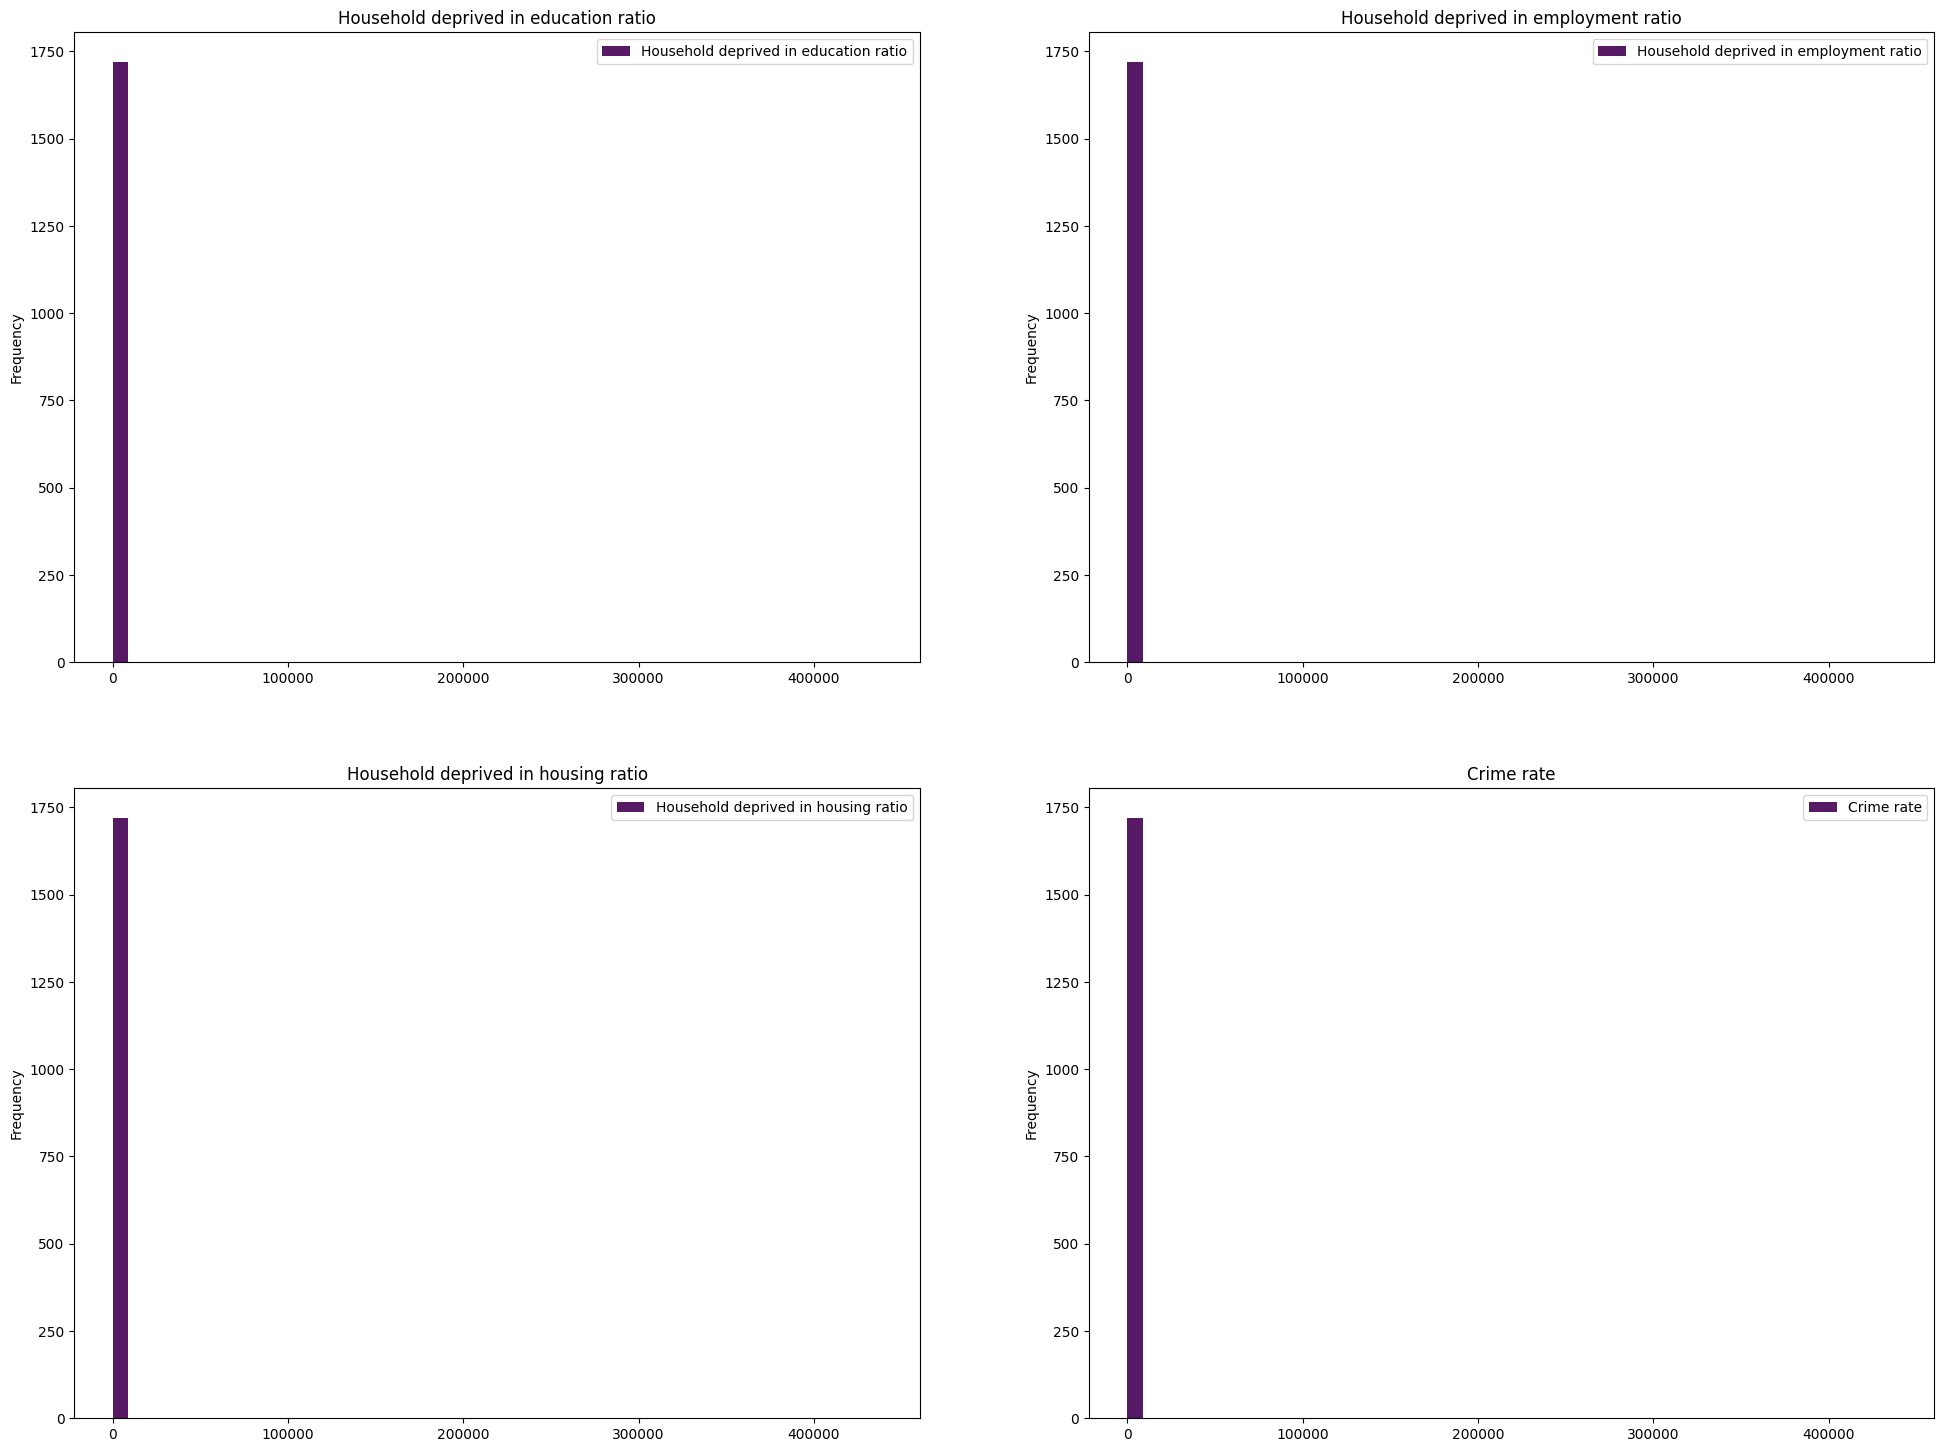

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))
axes = [ax1, ax2, ax3, ax4]

for i, type in enumerate(['Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio', 'Crime rate']):
    lsoa_merge_without_NA.plot.hist(ax=axes[i], column=type, legend=True, cmap='viridis', alpha=0.9,bins=50)
    axes[i].set_title(f'{type}')

plt.show()

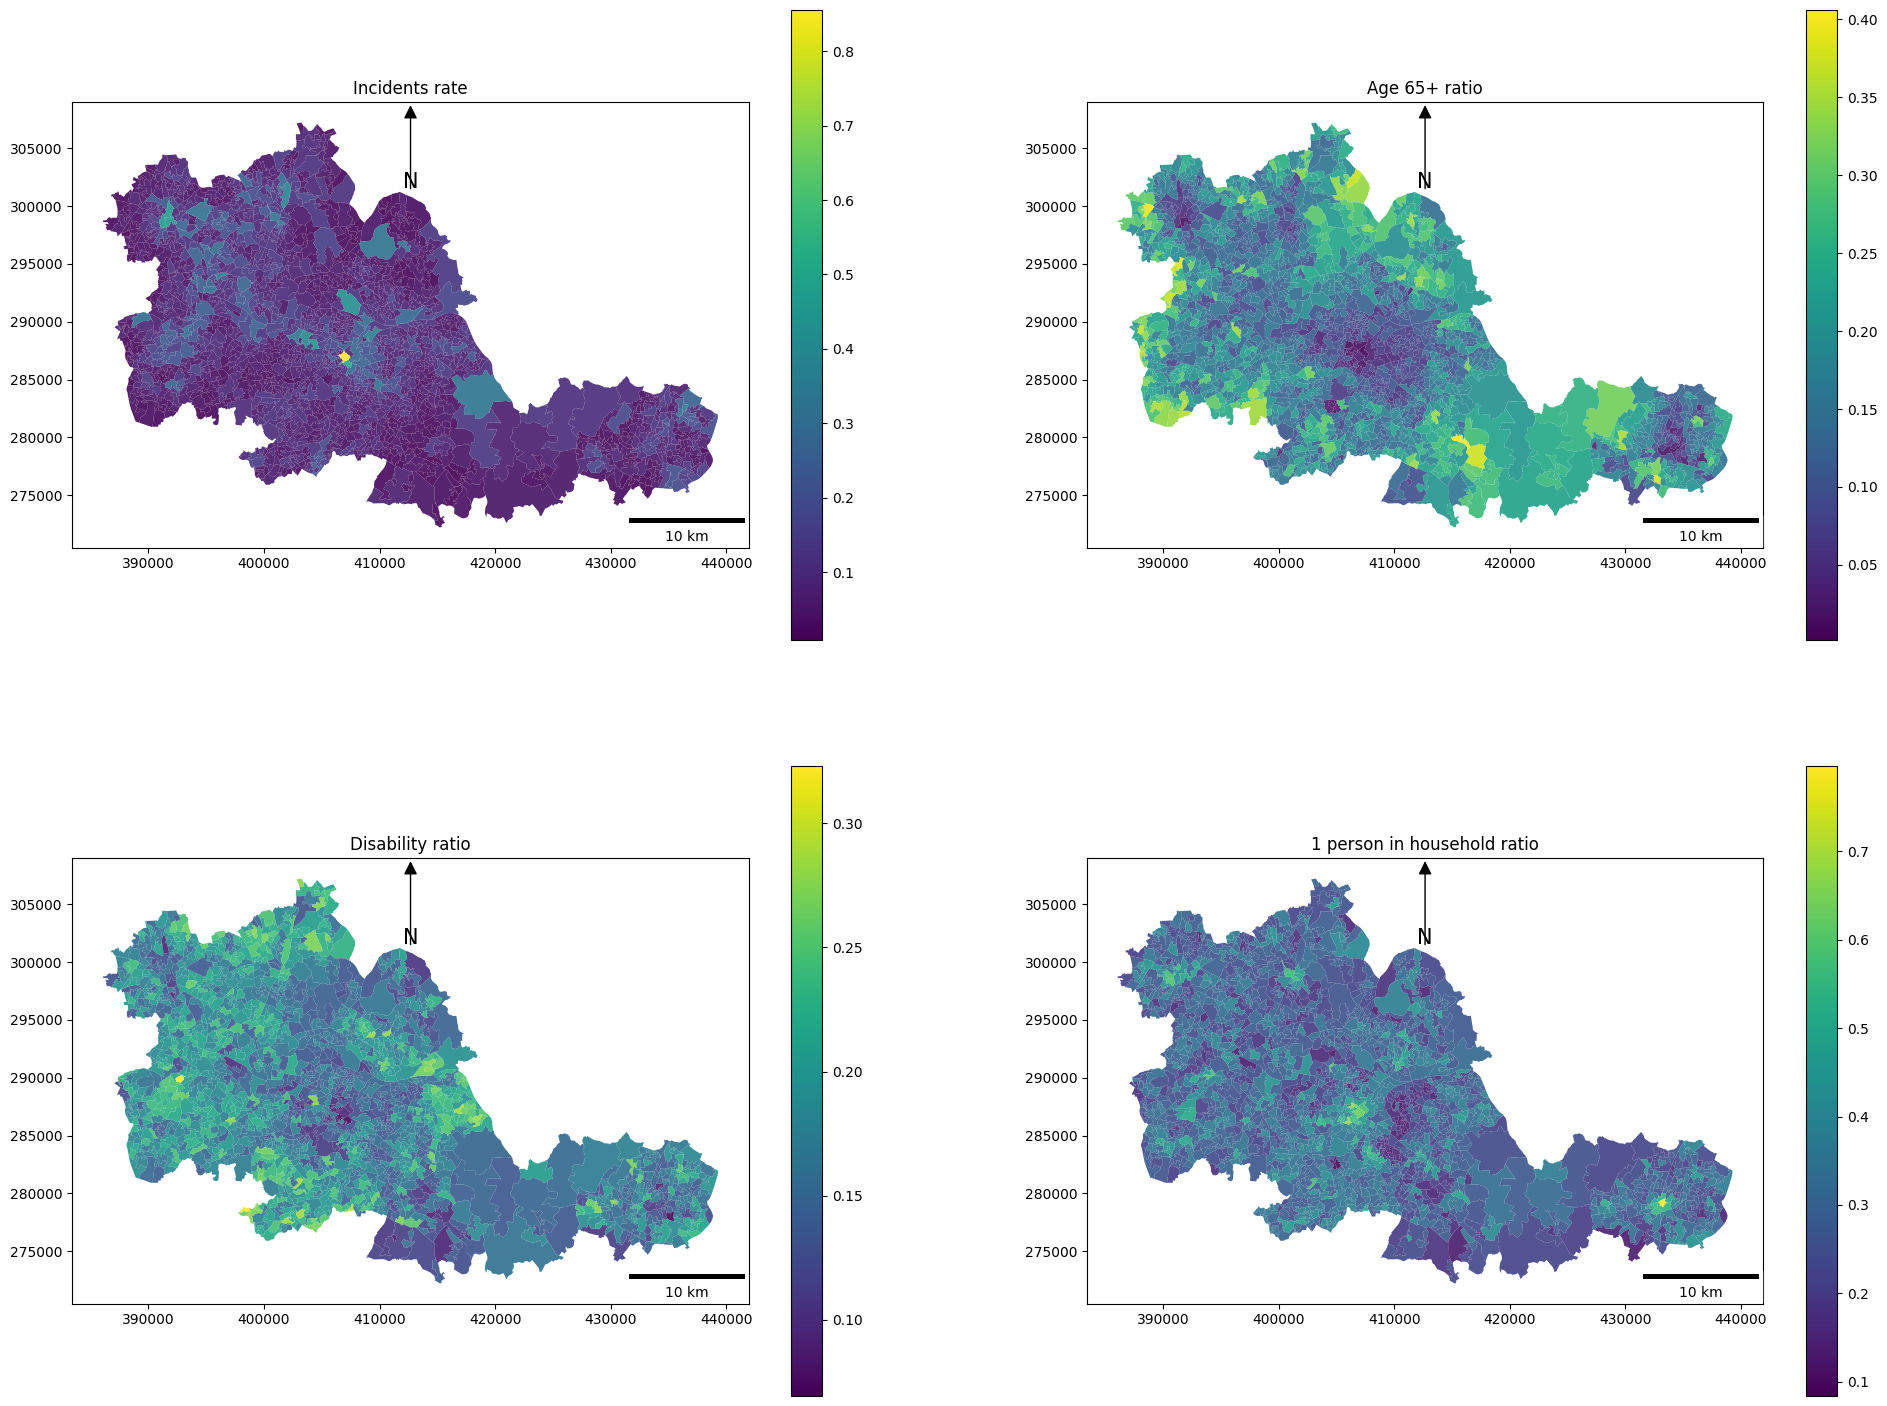

: 

In [89]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))
axes = [ax1, ax2, ax3, ax4]

for i, type in enumerate(['Incidents rate', 'Age 65+ ratio', 'Disability ratio', '1 person in household ratio']):
    lsoa_merge_without_NA.plot(ax=axes[i], column=type, legend=True, cmap='viridis', alpha=0.9)
    axes[i].set_title(f'{type}')
    
   
    
plt.show()

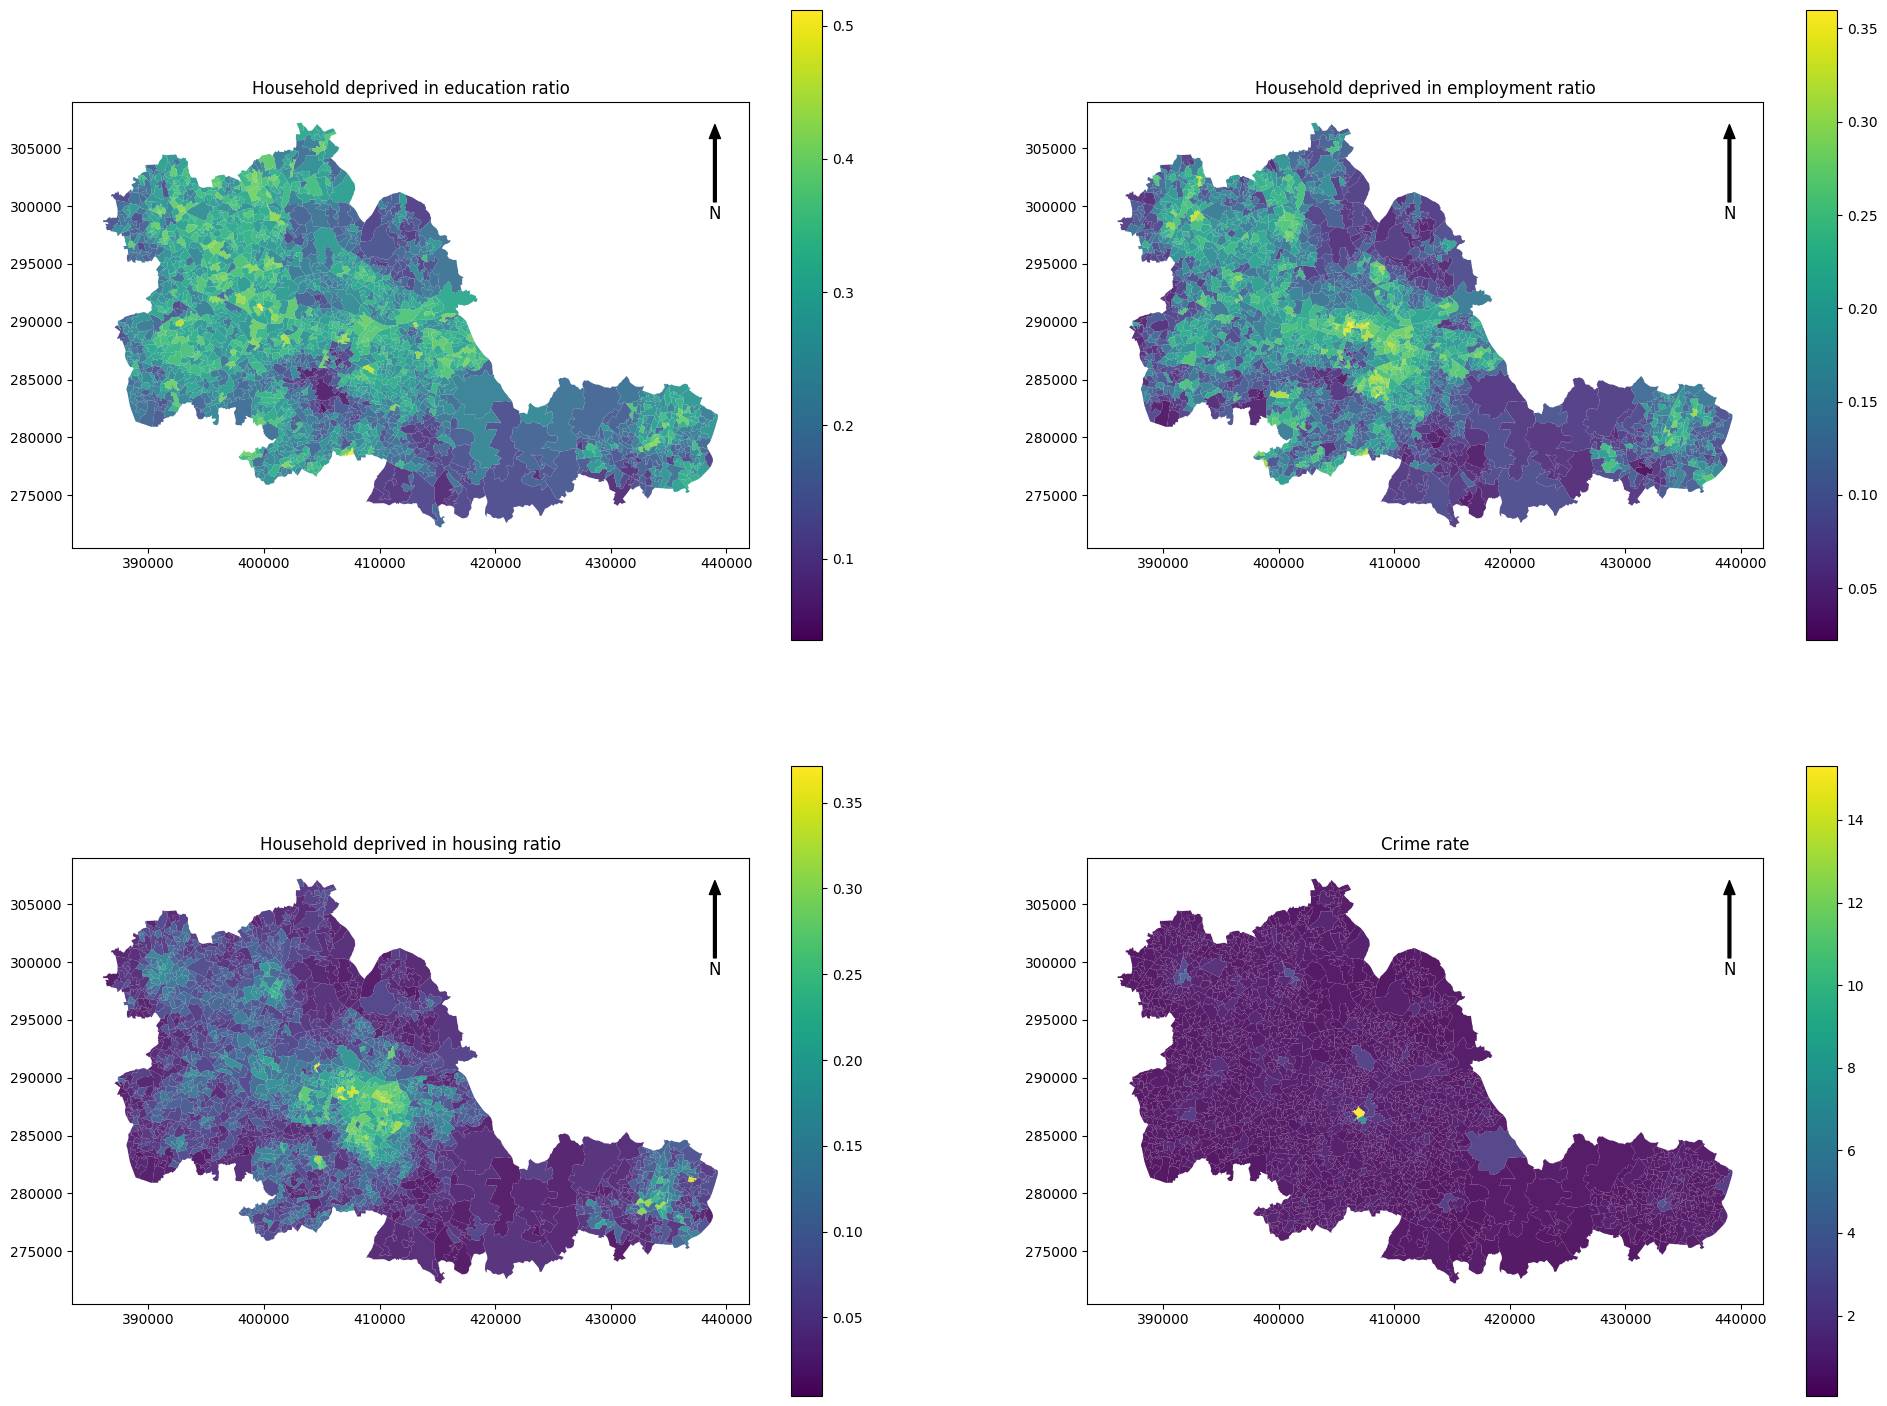

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 18))
axes = [ax1, ax2, ax3, ax4]

for i, type in enumerate(['Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio', 'Crime rate']):
    lsoa_merge_without_NA.plot(ax=axes[i], column=type, legend=True, cmap='viridis', alpha=0.9)
    axes[i].set_title(f'{type}')

   
   

plt.show()

In [ ]:
name_list = ['LSOA21CD','Incidents rate', 'Age 65+ ratio', 'Disability ratio', '1 person in household ratio','Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio', 'Crime rate' ]
df = lsoa_merge_without_NA[name_list]
# make the correlation matrix
df_numeric = df.loc[:, 'Incidents rate':'Crime rate']
df_cormatrix = df_numeric.corr()

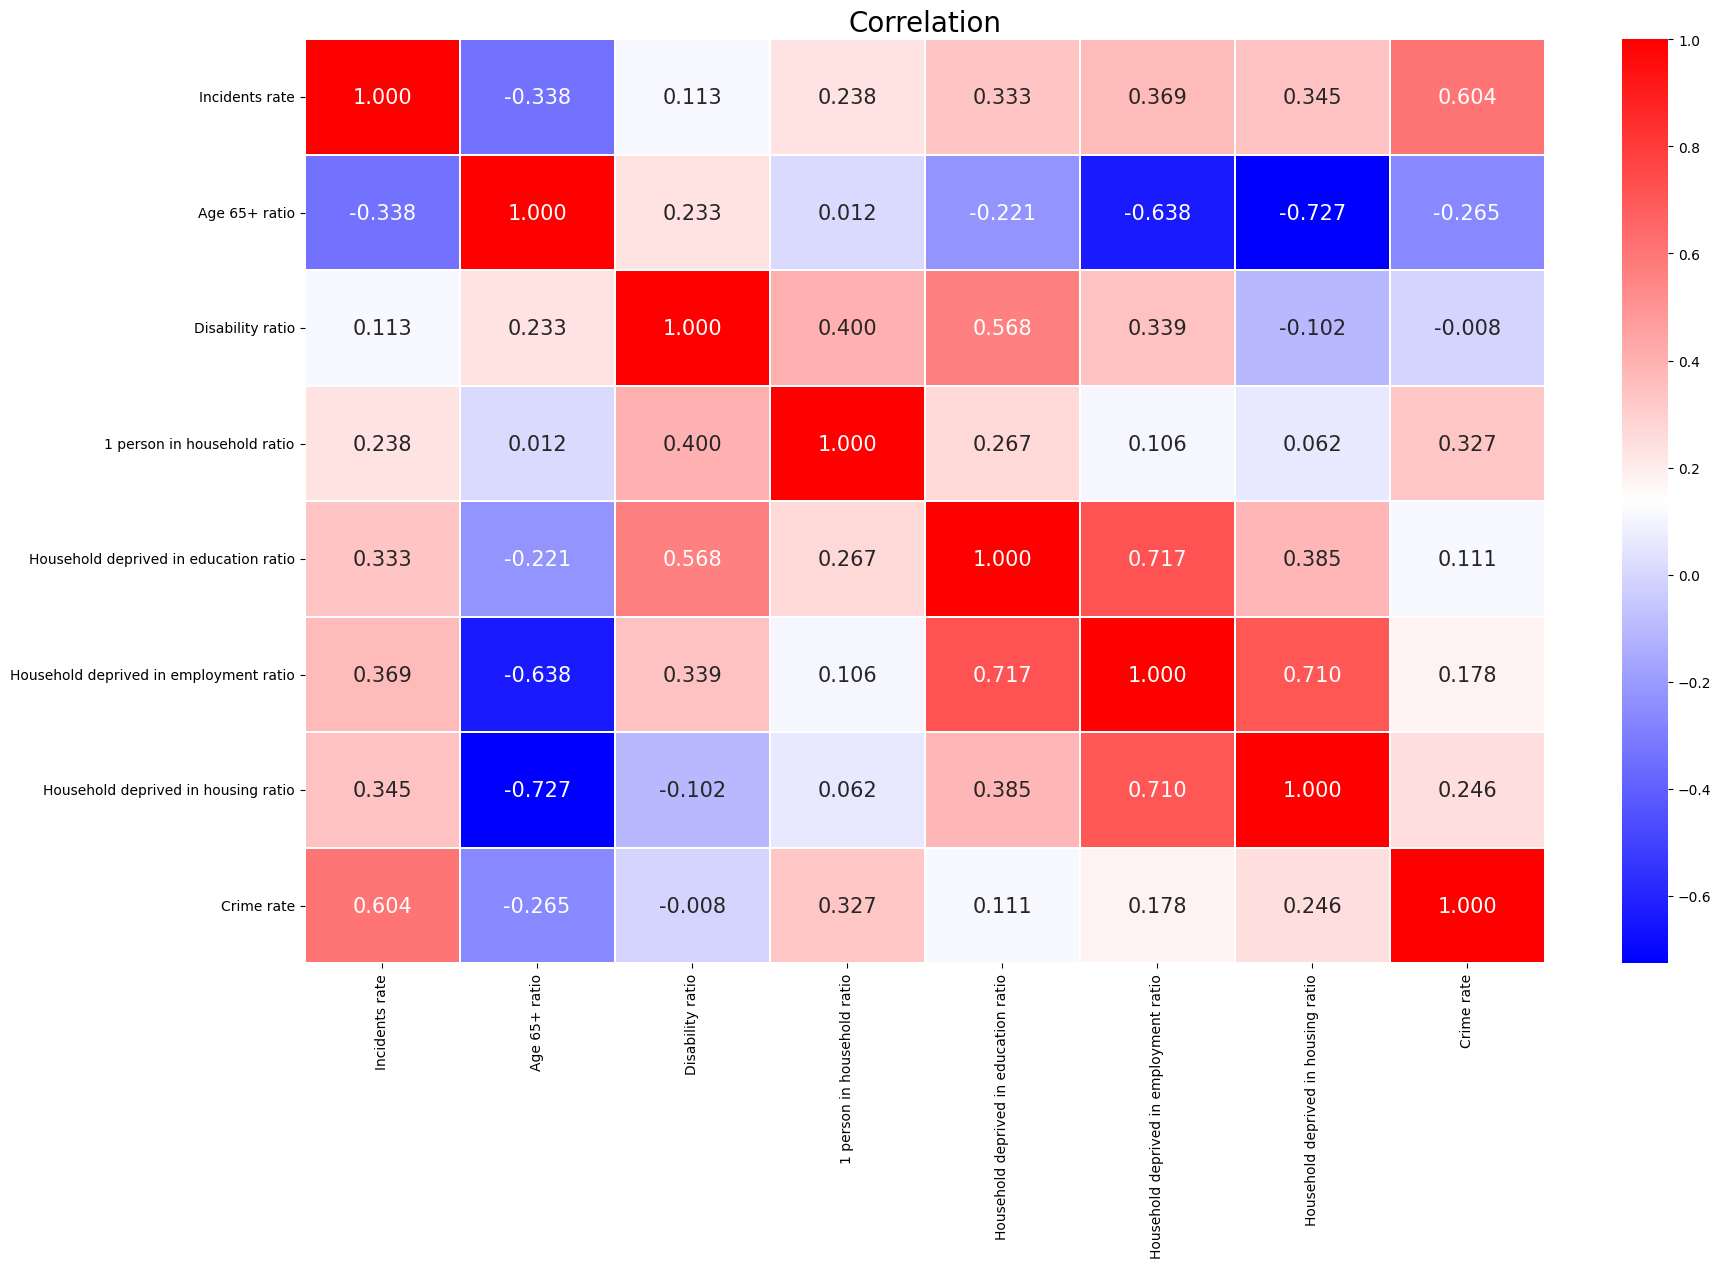

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(figsize = (20,12))
sns.heatmap(df_cormatrix, cmap ='bwr', annot = True, fmt='.3f', linewidths = 0.1, annot_kws = {'size': 15}, ax = axes)
axes.tick_params(labelsize = 10)
axes.set_title('Correlation', fontsize = 20)
plt.show()

In [ ]:
import statsmodels.api as sm
selected_features = ['Age 65+ ratio', 'Disability ratio', '1 person in household ratio','Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio', 'Crime rate' ]

OSLmodel1 = sm.OLS(endog=df[['Incidents rate']], exog=sm.add_constant(df[selected_features])).fit()

In [ ]:
OSLmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Incidents rate   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          7.50e-221
Time:                        11:16:58   Log-Likelihood:                 2863.1
No. Observations:                1719   AIC:                            -5710.
Df Residuals:                    1711   BIC:                            -5667.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0169      0.007      2.271      0.023       0.002       0.031
Age 65+ ratio                             -0.1091      0.028     -3.878      0.000      -0.164      -0.054
Disability ratio                           0.0563      0.046      1.234      0.217      -0.033       0.146
1 person in household ratio               -0.0082      0.016     -0.518      0.605      -0.039       0.023
Household deprived in education ratio      0.1688      0.024      7.001      0.000       0.122       0.216
Household deprived in employment ratio    -0.0033      0.040     -0.083      0.934      -0.081       0.075
Household deprived in housing ratio        0.0421      0.028      1.480      0.139      -0.014       0.098
Crime rate                                 0.0683      0.002     27.320      0.000       0.063       0.073
==============================================================================
Omnibus:                      784.024   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5251.387
Skew:                           2.028   Prob(JB):                         0.00
Kurtosis:                      10.541   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pandas as pd
import numpy as np

# 标准化数据
df_standardized = (lsoa_merge_without_NA.iloc[:, -8:] - lsoa_merge_without_NA.iloc[:, -8:].min()) / (lsoa_merge_without_NA.iloc[:, -8:].max() - lsoa_merge_without_NA.iloc[:, -8:].min())

# 计算关联系数
def grey_relational_coefficient(ref_series, comp_series, rho=0.5):
    diff = np.abs(ref_series - comp_series)
    min_diff = np.min(diff)
    max_diff = np.max(diff)
    return (min_diff + rho * max_diff) / (diff + rho * max_diff)


grey_relational_coefficient

In [ ]:

# 初始化关联矩阵
num_columns = df_standardized.shape[1]
relation_matrix = np.zeros((num_columns, num_columns))

# 构建关联矩阵
for i in range(num_columns):
    ref_series = df_standardized.iloc[:, i]
    for j in range(num_columns):
        comp_series = df_standardized.iloc[:, j]
        relation_matrix[i, j] = np.mean(grey_relational_coefficient(ref_series, comp_series))

relation_matrix_df = pd.DataFrame(relation_matrix, columns=df_standardized.columns, index=df_standardized.columns)
relation_matrix_df

Incidents rate  Age 65+ ratio  \
Incidents rate                                     NaN       0.632135   
Age 65+ ratio                                 0.632135            NaN   
Disability ratio                              0.592229       0.676128   
1 person in household ratio                   0.682856       0.746474   
Household deprived in education ratio         0.565530       0.659827   
Household deprived in employment ratio        0.616668       0.648488   
Household deprived in housing ratio           0.760978       0.646140   
Crime rate                                    0.802462       0.596177   

                                        Disability ratio  \
Incidents rate                                  0.592229   
Age 65+ ratio                                   0.676128   
Disability ratio                                     NaN   
1 person in household ratio                     0.733294   
Household deprived in education ratio           0.794355   
Household deprived in employment ratio          0.701404   
Household deprived in housing ratio             0.645671   
Crime rate                                      0.559982   

                                        1 person in household ratio  \
Incidents rate                                             0.682856   
Age 65+ ratio                                              0.746474   
Disability ratio                                           0.733294   
1 person in household ratio                                     NaN   
Household deprived in education ratio                      0.653384   
Household deprived in employment ratio                     0.739594   
Household deprived in housing ratio                        0.731760   
Crime rate                                                 0.611644   

                                        Household deprived in education ratio  \
Incidents rate                                                       0.565530   
Age 65+ ratio                                                        0.659827   
Disability ratio                                                     0.794355   
1 person in household ratio                                          0.653384   
Household deprived in education ratio                                     NaN   
Household deprived in employment ratio                               0.711463   
Household deprived in housing ratio                                  0.626307   
Crime rate                                                           0.535865   

                                        Household deprived in employment ratio  \
Incidents rate                                                        0.616668   
Age 65+ ratio                                                         0.648488   
Disability ratio                                                      0.701404   
1 person in household ratio                                           0.739594   
Household deprived in education ratio                                 0.711463   
Household deprived in employment ratio                                     NaN   
Household deprived in housing ratio                                   0.680700   
Crime rate                                                            0.587182   

                                        Household deprived in housing ratio  \
Incidents rate                                                     0.760978   
Age 65+ ratio                                                      0.646140   
Disability ratio                                                   0.645671   
1 person in household ratio                                        0.731760   
Household deprived in education ratio                              0.626307   
Household deprived in employment ratio                             0.680700   
Household deprived in housing ratio                                     NaN   
Crime rate                                                         0.714947   

                    

In [ ]:
# Select relevant features and target
target = 'Incidents rate'

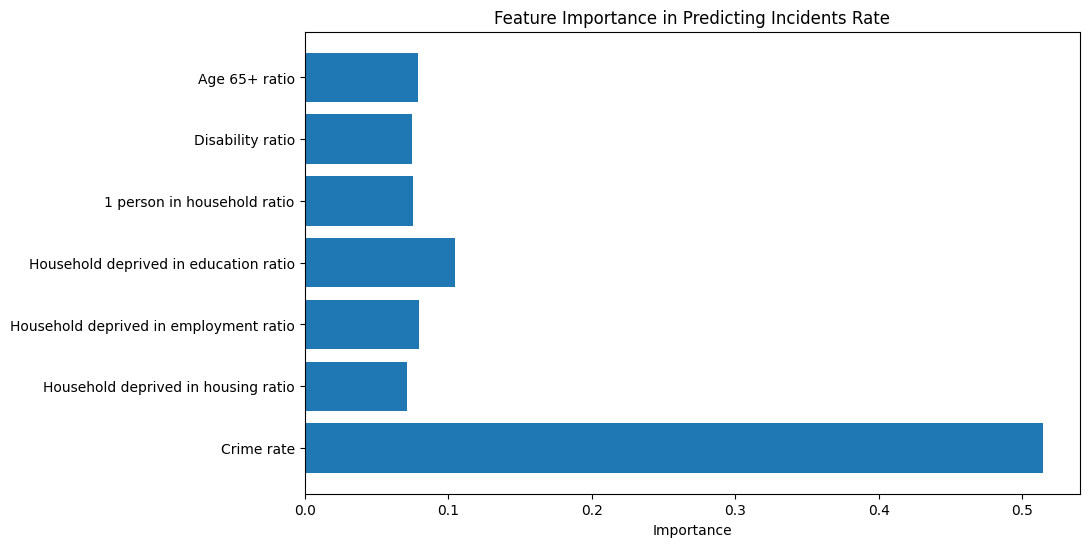

(0.002437721551364495,
 array([0.07880429, 0.07476539, 0.07569912, 0.10515319, 0.08003313,
        0.07116932, 0.51437555]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets
X = lsoa_merge_without_NA[selected_features]
y = lsoa_merge_without_NA[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Incidents Rate')
plt.gca().invert_yaxis()
plt.show()

mse, feature_importances

In [ ]:

selected_features_2 = ['Age 65+ ratio', 'Disability ratio', '1 person in household ratio','Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio']



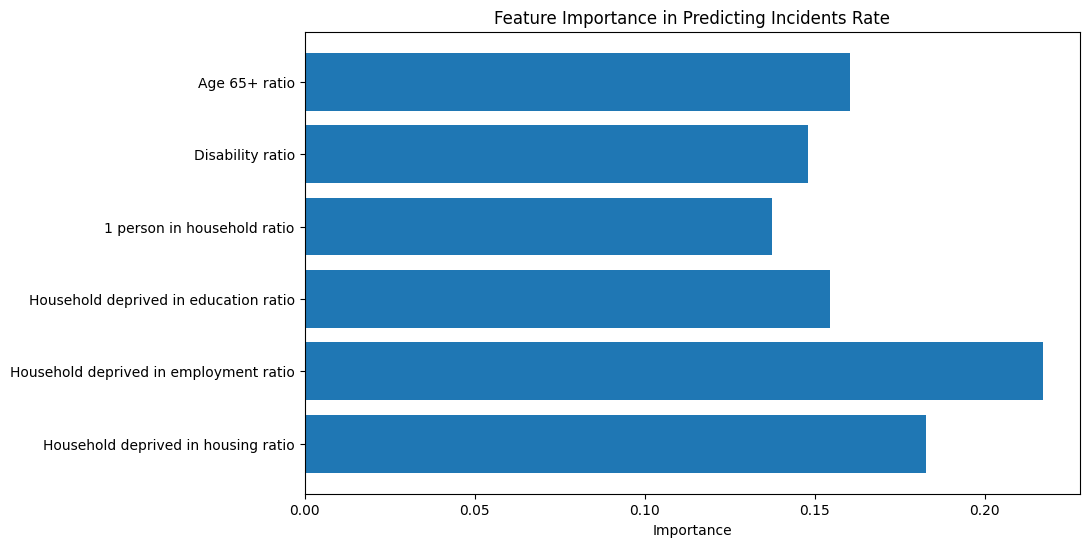

(0.004050757666875926,
 array([0.16046239, 0.14792731, 0.13736818, 0.15440117, 0.21706322,
        0.18277773]))

In [ ]:
# Split the data into training and testing sets
X = lsoa_merge_without_NA[selected_features_2]
y = lsoa_merge_without_NA[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(selected_features_2, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Incidents Rate')
plt.gca().invert_yaxis()
plt.show()

mse, feature_importances

In [ ]:

relation_matrix_df

Incidents rate  Age 65+ ratio  \
Incidents rate                                     NaN       0.632135   
Age 65+ ratio                                 0.632135            NaN   
Disability ratio                              0.592229       0.676128   
1 person in household ratio                   0.682856       0.746474   
Household deprived in education ratio         0.565530       0.659827   
Household deprived in employment ratio        0.616668       0.648488   
Household deprived in housing ratio           0.760978       0.646140   
Crime rate                                    0.802462       0.596177   

                                        Disability ratio  \
Incidents rate                                  0.592229   
Age 65+ ratio                                   0.676128   
Disability ratio                                     NaN   
1 person in household ratio                     0.733294   
Household deprived in education ratio           0.794355   
Household deprived in employment ratio          0.701404   
Household deprived in housing ratio             0.645671   
Crime rate                                      0.559982   

                                        1 person in household ratio  \
Incidents rate                                             0.682856   
Age 65+ ratio                                              0.746474   
Disability ratio                                           0.733294   
1 person in household ratio                                     NaN   
Household deprived in education ratio                      0.653384   
Household deprived in employment ratio                     0.739594   
Household deprived in housing ratio                        0.731760   
Crime rate                                                 0.611644   

                                        Household deprived in education ratio  \
Incidents rate                                                       0.565530   
Age 65+ ratio                                                        0.659827   
Disability ratio                                                     0.794355   
1 person in household ratio                                          0.653384   
Household deprived in education ratio                                     NaN   
Household deprived in employment ratio                               0.711463   
Household deprived in housing ratio                                  0.626307   
Crime rate                                                           0.535865   

                                        Household deprived in employment ratio  \
Incidents rate                                                        0.616668   
Age 65+ ratio                                                         0.648488   
Disability ratio                                                      0.701404   
1 person in household ratio                                           0.739594   
Household deprived in education ratio                                 0.711463   
Household deprived in employment ratio                                     NaN   
Household deprived in housing ratio                                   0.680700   
Crime rate                                                            0.587182   

                                        Household deprived in housing ratio  \
Incidents rate                                                     0.760978   
Age 65+ ratio                                                      0.646140   
Disability ratio                                                   0.645671   
1 person in household ratio                                        0.731760   
Household deprived in education ratio                              0.626307   
Household deprived in employment ratio                             0.680700   
Household deprived in housing ratio                                     NaN   
Crime rate                                                         0.714947   

                    

In [ ]:
import numpy as np

# 特征重要性值
importance_values = np.array([0.16046239, 0.14792731, 0.13736818, 0.15440117, 0.21706322,
        0.18277773])

# 创建判断矩阵
n = len(importance_values)
judgment_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        judgment_matrix[i, j] = importance_values[i] / importance_values[j]

# 计算最大特征值和对应的特征向量
eigvals, eigvecs = np.linalg.eig(judgment_matrix)
max_eigval = np.max(eigvals)
max_eigvec = eigvecs[:, np.argmax(eigvals)]

# 归一化特征向量以得到权重
weights = max_eigvec / np.sum(max_eigvec)

# 输出权重
weights_real = np.real(weights)  # 如果存在复数部分，取实部
weights_real


array([0.16046239, 0.14792731, 0.13736818, 0.15440117, 0.21706322,
       0.18277773])

In [ ]:
importance_values = np.array([0.632135,	0.592229,0.682856,0.565530,0.616668,0.760978])

# 创建判断矩阵
n = len(importance_values)
judgment_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        judgment_matrix[i, j] = importance_values[i] / importance_values[j]

# 计算最大特征值和对应的特征向量
eigvals, eigvecs = np.linalg.eig(judgment_matrix)
max_eigval = np.max(eigvals)
max_eigvec = eigvecs[:, np.argmax(eigvals)]

# 归一化特征向量以得到权重
weights = max_eigvec / np.sum(max_eigvec)

# 结果取实部（通常情况下是实数，但如果有复数我们只取实部）
weights_real2 = np.real(weights)

# 输出最终的权重
print(weights_real2)

[0.16417402 0.15380989 0.17734695 0.1468758  0.16015703 0.1976363 ]


In [ ]:
final_weights = (weights_real+weights_real2)/2
final_weights

array([0.16231821, 0.1508686 , 0.15735757, 0.15063849, 0.18861013,
       0.19020701])

In [ ]:
col = relation_matrix_df.shape[1]

In [ ]:
df_standardized.head()

Incidents rate  Age 65+ ratio  Disability ratio  \
0        0.084497       0.325689          0.397077   
1        0.109906       0.207460          0.369137   
2        0.110908       0.230715          0.406867   
3        0.214317       0.169180          0.302909   
4        0.029994       0.372481          0.277568   

   1 person in household ratio  Household deprived in education ratio  \
0                     0.237942                               0.536805   
1                     0.226364                               0.624606   
2                     0.239194                               0.531763   
3                     0.236102                               0.599674   
4                     0.230355                               0.446271   

   Household deprived in employment ratio  \
0                                0.476712   
1                                0.598618   
2                                0.631532   
3                                0.534771   
4                                0.233700   

   Household deprived in housing ratio  Crime rate  
0                             0.398937    0.036890  
1                             0.494413    0.018049  
2                             0.463139    0.023534  
3                             0.368298    0.031571  
4                             0.139812    0.015991

In [ ]:

# 定义评分函数
def score(value, min_value, max_value):
    thresholds = np.linspace(min_value, max_value, 6)
    if value <= thresholds[1]:
        return 1
    elif value <= thresholds[2]:
        return 2
    elif value <= thresholds[3]:
        return 3
    elif value <= thresholds[4]:
        return 4
    else:
        return 5


In [ ]:
def score_verse(value, min_value, max_value):
    thresholds = np.linspace(min_value, max_value, 6)
    if value <= thresholds[1]:
        return 5
    elif value <= thresholds[2]:
        return 4
    elif value <= thresholds[3]:
        return 3
    elif value <= thresholds[4]:
        return 2
    else:
        return 1

In [ ]:

for i, type in enumerate(['Disability ratio', '1 person in household ratio','Household deprived in education ratio', 'Household deprived in employment ratio', 'Household deprived in housing ratio', 'Crime rate']):
    min_value = lsoa_merge_without_NA[type].min()
    max_value = lsoa_merge_without_NA[type].max()
    lsoa_merge_without_NA[type+" socre"] = lsoa_merge_without_NA[type].apply(score, args=(min_value, max_value))

lsoa_merge_without_NA.head()


FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ...  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...   

  Household deprived in education ratio  \
0                              0.292808   
1                              0.334324   
2                              0.290424   
3                              0.322535   
4                              0.250000   

   Household deprived in employment ratio  \
0                                0.183219   
1                                0.224368   
2                                0.235479   
3                                0.202817   
4                                0.101190   

   Household deprived in housing ratio  Crime rate  Disability ratio socre  \
0                             0.150685    0.613975                       2   
1                             0.185736    0.326521                       2   
2                             0.174254    0.410205                       3   
3                             0.139437    0.532820                       2   
4                             0.055556    0.295118                       2   

   1 person in household ratio socre  \
0                                  2   
1                                  2   
2                                  2   
3                                  2   
4                                  2   

   Household deprived in education ratio socre  \
0                                            3   
1                                            4   
2                                            3   
3                                            3   
4                                            3   

   Household deprived in employment ratio socre  \
0                                             3   
1                                             3   
2                                             4   
3                                             3   
4                                             2   

   Household deprived in housing ratio socre  Crime rate socre  
0                                          2                 1  
1                                          3                 1  
2                                          3                 1  
3                                          2                 1  
4                                          1                 1  

[5 rows x 35 columns]

In [ ]:
min_value = lsoa_merge_without_NA['Age 65+ ratio'].min()
max_value = lsoa_merge_without_NA['Age 65+ ratio'].max()
lsoa_merge_without_NA['Age 65+ ratio' +" socre"] = lsoa_merge_without_NA['Age 65+ ratio'].apply(score_verse, args=(min_value, max_value))

In [ ]:
final_weights

array([0.16231821, 0.1508686 , 0.15735757, 0.15063849, 0.18861013,
       0.19020701])

final model

In [ ]:
lsoa_merge_without_NA['risk_score'] = 0.51437555*lsoa_merge_without_NA['Crime rate socre'] + (1-0.51437555)*(+0.16231821*lsoa_merge_without_NA['Age 65+ ratio socre']+0.1508686*lsoa_merge_without_NA['Disability ratio socre']+0.15735757*lsoa_merge_without_NA['1 person in household ratio socre']+0.15063849*lsoa_merge_without_NA['Household deprived in education ratio socre']+ 0.18861013*lsoa_merge_without_NA['Household deprived in employment ratio socre']+ 0.19020701*lsoa_merge_without_NA['Household deprived in housing ratio socre'])

In [ ]:
lsoa_merge_without_NA.tail()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry  ...  \
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  ...   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  ...   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  ...   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  ...   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  ...   

     Household deprived in housing ratio  Crime rate  Disability ratio socre  \
1714                            0.135225    0.684734                       1   
1715                            0.221130    0.340310                       2   
1716                            0.215686    0.225587                       2   
1717                            0.160784    0.245817                       2   
1718                            0.185965    0.224290                       2   

      1 person in household ratio socre  \
1714                                  3   
1715                                  1   
1716                                  1   
1717                                  1   
1718                                  1   

      Household deprived in education ratio socre  \
1714                                            1   
1715                                            3   
1716                                            3   
1717                                            3   
1718                                            3   

      Household deprived in employment ratio socre  \
1714                                             2   
1715                                             3   
1716                                             3   
1717                                             3   
1718                                             3   

      Household deprived in housing ratio socre  Crime rate socre  \
1714                                          2                 1   
1715                                          3                 1   
1716                                          3                 1   
1717                                          3                 1   
1718                                          3                 1   

      Age 65+ ratio socre  risk_score  
1714                    5    1.652099  
1715                    5    1.902801  
1716                    4    1.823976  
1717                    5    1.902801  
1718                    5    1.902801  

[5 rows x 37 columns]

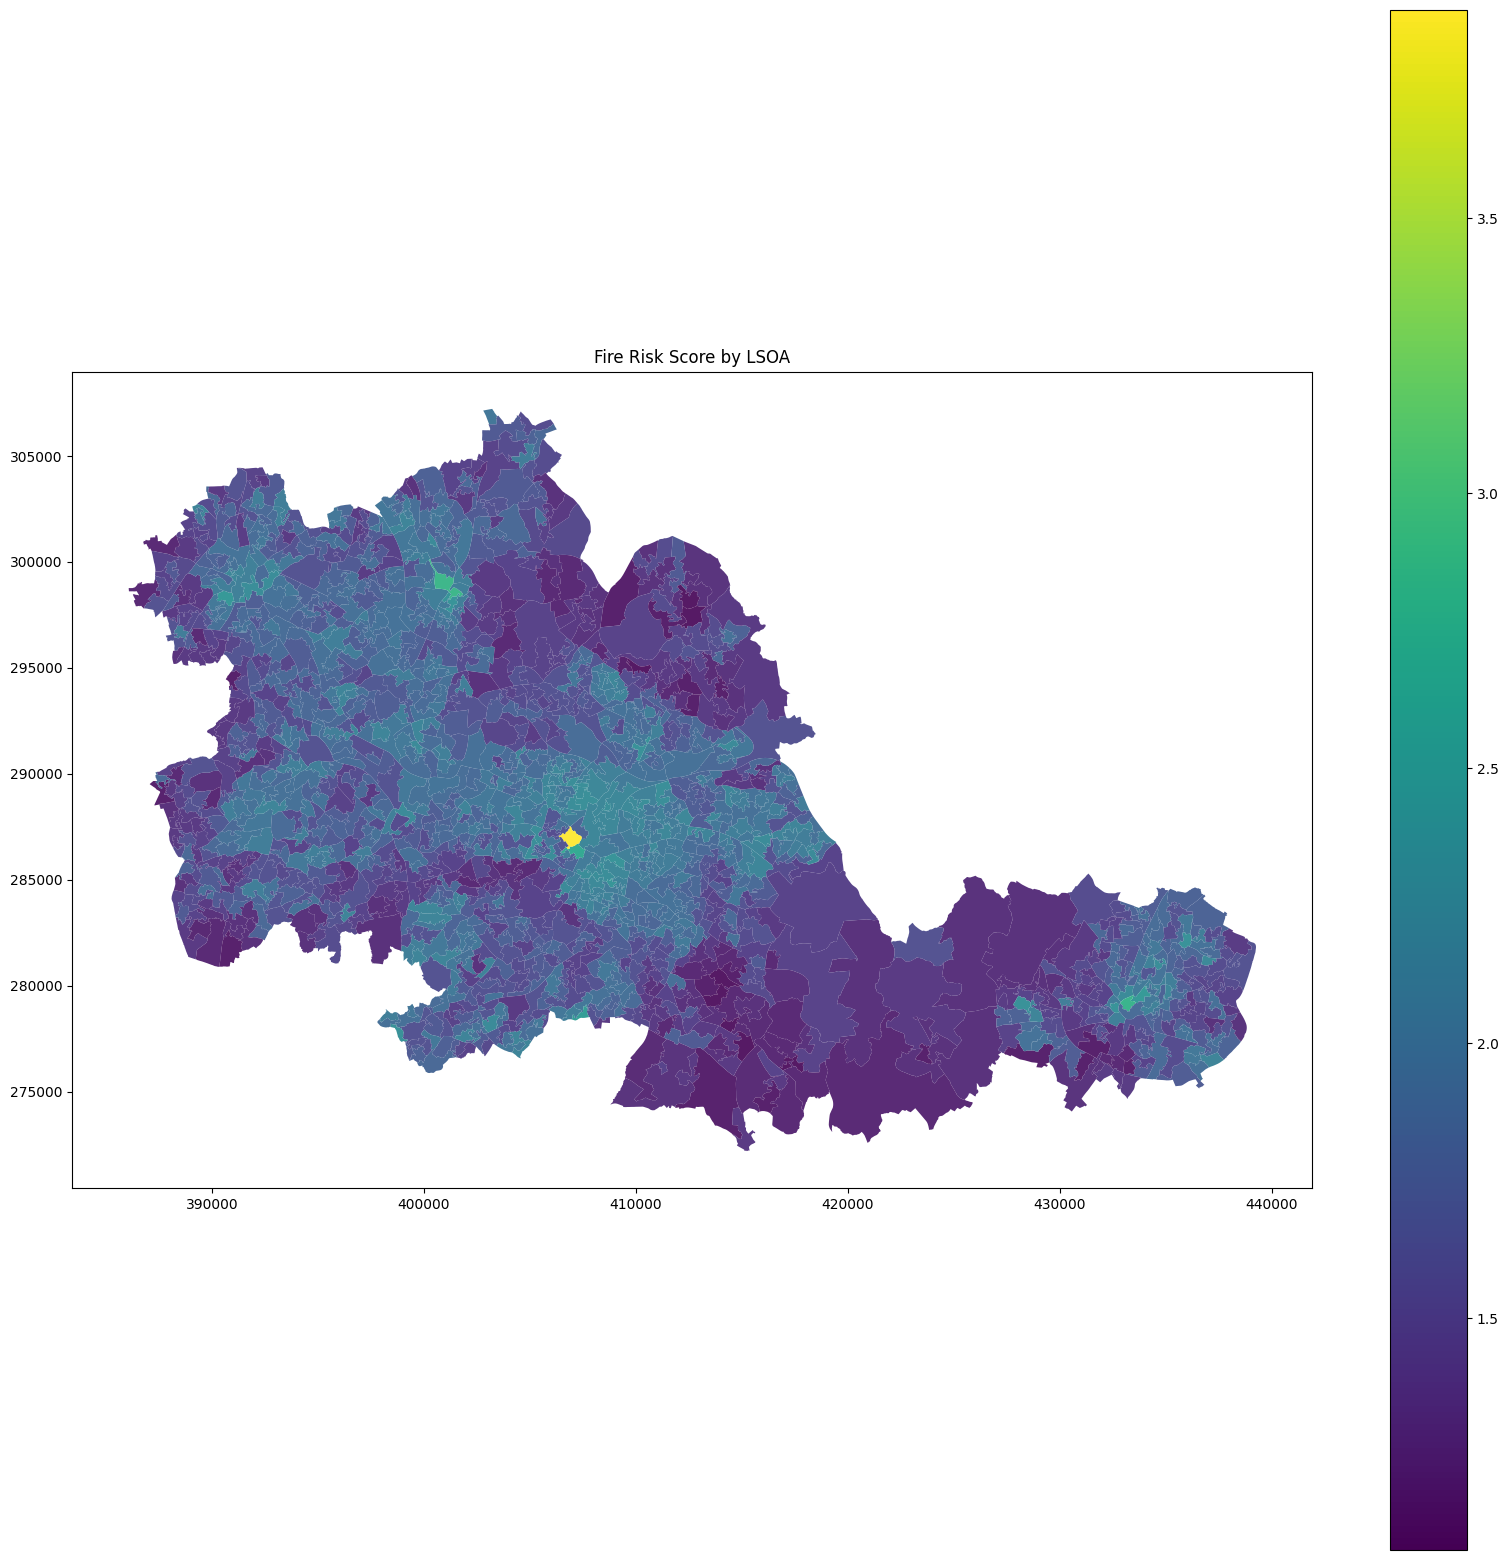

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
lsoa_merge_without_NA.plot(column='risk_score', ax=ax, legend=True, cmap='viridis',  alpha=0.9)
plt.title('Fire Risk Score by LSOA')
plt.show()

In [ ]:
def score3(value, min_value, max_value):
    thresholds = np.linspace(min_value, max_value, 6)
    if value <= thresholds[1]:
        return 'very low risk'
    elif value <= thresholds[2]:
        return 'low risk'
    elif value <= thresholds[3]:
        return 'moderate risk'
    elif value <= thresholds[4]:
        return 'high risk'
    else:
        return 'very high risk'

In [ ]:
min_value = lsoa_merge_without_NA['risk_score'].min()
max_value = lsoa_merge_without_NA['risk_score'].max()
lsoa_merge_without_NA['Risk Category'] = lsoa_merge_without_NA['risk_score'].apply(score3, args=(min_value, max_value))

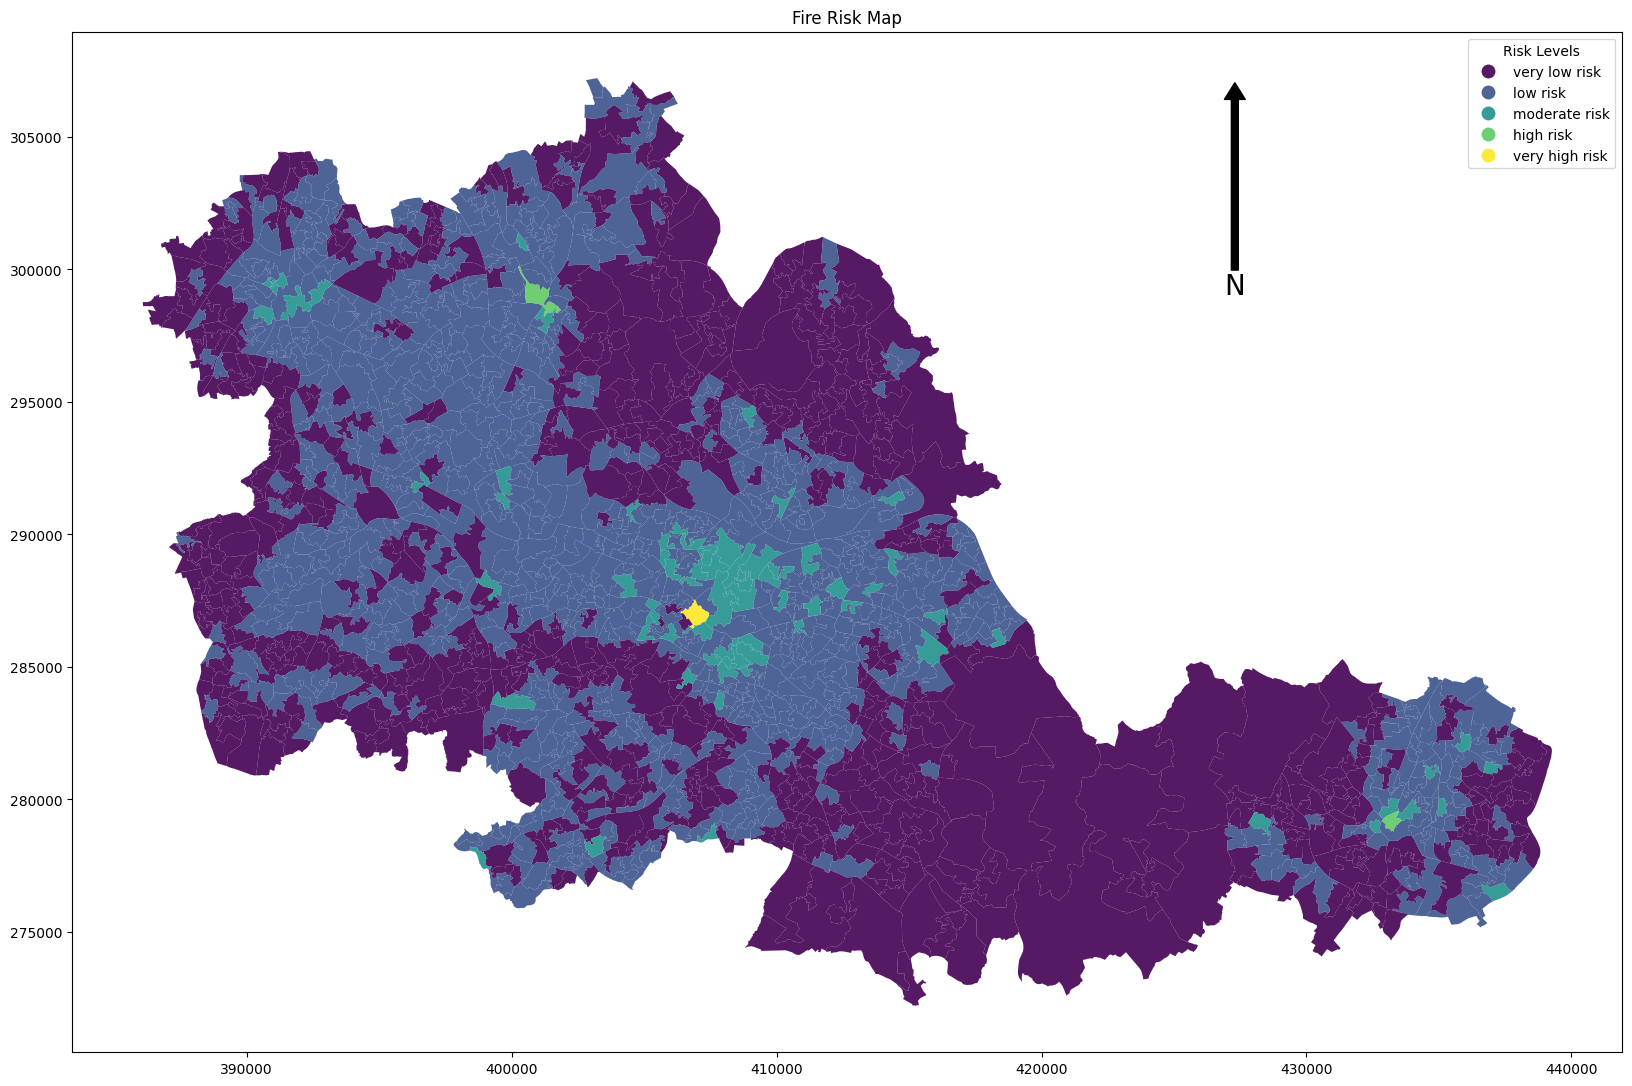

In [ ]:
lsoa_merge_without_NA['Risk Category'] = pd.Categorical(
    lsoa_merge_without_NA['Risk Category'],
    categories=['very low risk', 'low risk', 'moderate risk', 'high risk', 'very high risk'],
    ordered=True
)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
lsoa_merge_without_NA.plot(column='Risk Category', ax=ax, legend=True, cmap='viridis', alpha=0.9)

# Adjust the legend to be ordered correctly
leg = ax.get_legend()
leg.set_title("Risk Levels")
labels = ['very low risk', 'low risk', 'moderate risk', 'high risk', 'very high risk']
for text, label in zip(leg.get_texts(), labels):
    text.set_text(label)




plt.title('Fire Risk Map')
plt.show()


In [ ]:
lsoa_merge_without_NA.head()

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0  8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1  8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2  8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3  8453  E01008884  Birmingham 078B            411241  284712  52.46026   
4  8454  E01008885  Birmingham 076A            413207  284818  52.46117   

      LONG                              GlobalID  \
0 -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1 -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2 -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3 -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
4 -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   

                                            geometry  ... Crime rate  \
0  POLYGON ((413033.000 285817.000, 413036.000 28...  ...   0.613975   
1  POLYGON ((411787.206 285679.513, 411803.091 28...  ...   0.326521   
2  POLYGON ((412227.697 285391.500, 412228.570 28...  ...   0.410205   
3  POLYGON ((411934.831 285273.169, 411932.794 28...  ...   0.532820   
4  POLYGON ((413380.303 284868.362, 413404.313 28...  ...   0.295118   

   Disability ratio socre  1 person in household ratio socre  \
0                       2                                  2   
1                       2                                  2   
2                       3                                  2   
3                       2                                  2   
4                       2                                  2   

   Household deprived in education ratio socre  \
0                                            3   
1                                            4   
2                                            3   
3                                            3   
4                                            3   

   Household deprived in employment ratio socre  \
0                                             3   
1                                             3   
2                                             4   
3                                             3   
4                                             2   

   Household deprived in housing ratio socre  Crime rate socre  \
0                                          2                 1   
1                                          3                 1   
2                                          3                 1   
3                                          2                 1   
4                                          1                 1   

   Age 65+ ratio socre  risk_score  Risk Category  
0                    4    1.808023       low risk  
1                    4    1.973546       low risk  
2                    4    2.065252       low risk  
3                    5    1.886849       low risk  
4                    4    1.624060  very low risk  

[5 rows x 38 columns]

In [ ]:
lsoa_merge_without_NA.to_csv('data/lsoa_merged.csv', index=False)

In [ ]:
lsoa_merge_without_NA_high_risk = lsoa_merge_without_NA[lsoa_merge_without_NA['Risk Category'] == 'very high risk']
lsoa_merge_without_NA_high_risk

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1621  31700  E01033620  Birmingham 138A            406908  287054  52.48138   

         LONG                              GlobalID  \
1621 -1.89971  70ce3eb9-6432-44ac-9161-c684cc18b445   

                                               geometry  ... Crime rate  \
1621  POLYGON ((406971.482 287420.406, 406971.432 28...  ...  15.307549   

      Disability ratio socre  1 person in household ratio socre  \
1621                       1                                  4   

      Household deprived in education ratio socre  \
1621                                            1   

      Household deprived in employment ratio socre  \
1621                                             2   

      Household deprived in housing ratio socre  Crime rate socre  \
1621                                          3                 5   

      Age 65+ ratio socre  risk_score   Risk Category  
1621                    5    3.878387  very high risk  

[1 rows x 38 columns]

In [ ]:
lsoa_merge_without_NA_high_risk2 = lsoa_merge_without_NA[lsoa_merge_without_NA['Risk Category'] == 'high risk']
lsoa_merge_without_NA_high_risk2 

FID   LSOA21CD       LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
1394   9844  E01010368   Walsall 030A            400962  299170  52.59035   
1668  32782  E01034743  Coventry 031E            433203  279170  52.40955   

         LONG                              GlobalID  \
1394 -1.98723  696996c0-7453-4cc4-a2dc-5f167a0759d2   
1668 -1.51331  2b6cd9a8-c080-4ce9-a874-f1c35d3f8075   

                                               geometry  ... Crime rate  \
1394  POLYGON ((400669.860 299465.302, 400676.524 29...  ...   3.110555   
1668  POLYGON ((433400.000 279363.333, 433388.592 27...  ...   3.112524   

      Disability ratio socre  1 person in household ratio socre  \
1394                       4                                  4   
1668                       1                                  5   

      Household deprived in education ratio socre  \
1394                                            5   
1668                                            4   

      Household deprived in employment ratio socre  \
1394                                             4   
1668                                             2   

      Household deprived in housing ratio socre  Crime rate socre  \
1394                                          2                 2   
1668                                          5                 2   

      Age 65+ ratio socre  risk_score  Risk Category  
1394                    4    2.859664      high risk  
1668                    5    2.815877      high risk  

[2 rows x 38 columns]

In [ ]:
lsoa_merge_without_NA_high_risk23 = lsoa_merge_without_NA[lsoa_merge_without_NA['Risk Category'] == 'moderate risk']
lsoa_merge_without_NA_high_risk23

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
19     8469  E01008901  Birmingham 037C            408084  289443  52.50284   
22     8472  E01008907  Birmingham 040B            405801  289270  52.50132   
24     8474  E01008910  Birmingham 050A            407703  288781  52.49690   
26     8476  E01008913  Birmingham 050B            407075  288668  52.49589   
88     8538  E01008978  Birmingham 121B            407549  278747  52.40669   
...     ...        ...              ...       ...     ...     ...       ...   
1689  32921  E01034926  Birmingham 041K            407421  289109  52.49985   
1690  32922  E01034927  Birmingham 043D            408578  288954  52.49844   
1691  32923  E01034928  Birmingham 043E            408618  288484  52.49421   
1692  32924  E01034929  Birmingham 050G            406778  288234  52.49199   
1695  32927  E01034932  Birmingham 051G            410194  287539  52.48569   

         LONG                              GlobalID  \
19   -1.88233  b5bf62fe-d462-4964-97fc-38107808927e   
22   -1.91597  5213a544-dd3a-4a6d-8e26-85adf356cbf8   
24   -1.88796  5ef13fde-bb37-49af-a3dc-fef280f62427   
26   -1.89721  a194c9c0-dd35-4b33-a595-799f1cbf954a   
88   -1.89045  a9fc726a-dedb-48ca-ba12-a86c04c1728e   
...       ...                                   ...   
1689 -1.89211  434f0b68-d99a-4d82-853a-1b810be1971d   
1690 -1.87507  1f833352-b2ff-4c01-9fe6-640419cc8896   
1691 -1.87449  397328cc-d2c8-4763-9f31-3362860a1765   
1692 -1.90160  ef01b08a-52a3-42bc-918d-18a0c090ff7f   
1695 -1.85131  bd7ad7d4-18bd-4d8b-be8d-f157e0aa3ccd   

                                               geometry  ... Crime rate  \
19    POLYGON ((408035.673 290092.795, 408041.000 29...  ...   0.522363   
22    POLYGON ((405829.905 289412.781, 405838.599 28...  ...   0.681818   
24    POLYGON ((407626.171 289255.649, 407624.655 28...  ...   0.544989   
26    POLYGON ((407189.354 288859.100, 407189.000 28...  ...   0.585474   
88    POLYGON ((407661.340 279029.736, 407660.740 27...  ...   0.491815   
...                                                 ...  ...        ...   
1689  POLYGON ((407406.000 289387.495, 407408.323 28...  ...   0.303699   
1690  POLYGON ((409022.713 289617.809, 409060.261 28...  ...   0.551412   
1691  POLYGON ((408703.788 288575.546, 408728.475 28...  ...   0.255644   
1692  POLYGON ((406537.413 288413.517, 406521.625 28...  ...   0.306431   
1695  POLYGON ((410523.006 287837.025, 410513.802 28...  ...   0.278796   

      Disability ratio socre  1 person in household ratio socre  \
19                         3                                  2   
22                         3                                  2   
24                         2                                  2   
26                         2                                  3   
88                         5                                  3   
...                      ...                                ...   
1689                       3                                  3   
1690                       2                                  2   
1691                       2                                  2   
1692                       1                                  2   
1695                       2                                  2   

      Household deprived in education ratio socre  \
19                                              4   
22                                              3   
24                                              3   
26                                              5   
88                                              5   
...                                           ...   
1689                                            4   
1690                                            4   
1691                                            4   
1692                                            5   
1695                                            4   

      Household deprived in employment ratio socre  \
1

In [ ]:
lsoa_merge_without_NA_high_risk23 = lsoa_merge_without_NA[lsoa_merge_without_NA['Risk Category'] == 'low risk']
lsoa_merge_without_NA_high_risk23

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
0      8450  E01008881  Birmingham 067A            412690  285438  52.46675   
1      8451  E01008882  Birmingham 066A            411772  285390  52.46634   
2      8452  E01008883  Birmingham 078A            412121  285001  52.46284   
3      8453  E01008884  Birmingham 078B            411241  284712  52.46026   
5      8455  E01008886  Birmingham 076B            412811  284716  52.46026   
...     ...        ...              ...       ...     ...     ...       ...   
1714  32946  E01034951  Birmingham 137G            405775  287416  52.48465   
1715  32947  E01034952  Birmingham 142B            410425  284201  52.45568   
1716  32948  E01034953  Birmingham 142C            409630  283662  52.45085   
1717  32949  E01034954  Birmingham 143A            410443  283749  52.45161   
1718  32950  E01034955  Birmingham 143B            410282  283373  52.44824   

         LONG                              GlobalID  \
0    -1.81463  90f0f767-eeb2-42ec-bef6-e34ed0468bce   
1    -1.82814  0fbea44b-37f6-4b88-9209-5eede6d78a92   
2    -1.82302  e3a11b24-cc29-425d-9faf-82fc17c9e676   
3    -1.83598  574c61fa-9e47-416a-8cf8-f38519113bc8   
5    -1.81288  115dad67-044d-43ae-8bf4-1f00c0759ca6   
...       ...                                   ...   
1714 -1.91638  03c9ac8f-86e9-48d1-8aa8-aab748f6d1bf   
1715 -1.84801  945e33c6-5719-4f5b-9b53-7d5fe25f0eb0   
1716 -1.85972  ae5d6636-1a7c-414a-bf86-24f321abeeec   
1717 -1.84776  4708dc99-6150-44c6-be09-798369b45893   
1718 -1.85014  638cb39d-5f27-4531-99e1-f36675b9baae   

                                               geometry  ... Crime rate  \
0     POLYGON ((413033.000 285817.000, 413036.000 28...  ...   0.613975   
1     POLYGON ((411787.206 285679.513, 411803.091 28...  ...   0.326521   
2     POLYGON ((412227.697 285391.500, 412228.570 28...  ...   0.410205   
3     POLYGON ((411934.831 285273.169, 411932.794 28...  ...   0.532820   
5     POLYGON ((413119.662 285183.211, 413119.707 28...  ...   1.125235   
...                                                 ...  ...        ...   
1714  POLYGON ((406293.107 287694.662, 406295.234 28...  ...   0.684734   
1715  POLYGON ((410436.781 284511.999, 410538.000 28...  ...   0.340310   
1716  POLYGON ((409830.548 284037.548, 409846.450 28...  ...   0.225587   
1717  POLYGON ((410467.090 283937.633, 410475.000 28...  ...   0.245817   
1718  POLYGON ((410668.336 283368.743, 410673.208 28...  ...   0.224290   

      Disability ratio socre  1 person in household ratio socre  \
0                          2                                  2   
1                          2                                  2   
2                          3                                  2   
3                          2                                  2   
5                          3                                  3   
...                      ...                                ...   
1714                       1                                  3   
1715                       2                                  1   
1716                       2                                  1   
1717                       2                                  1   
1718                       2                                  1   

      Household deprived in education ratio socre  \
0                                               3   
1                                               4   
2                                               3   
3                                               3   
5                                               3   
...                                           ...   
1714                                            1   
1715                                            3   
1716                                            3   
1717                                            3   
1718                                            3   

      Household deprived in employment ratio socre  \
0

In [ ]:
lsoa_merge_without_NA_high_risk23 = lsoa_merge_without_NA[lsoa_merge_without_NA['Risk Category'] == 'very low risk']
lsoa_merge_without_NA_high_risk23

FID   LSOA21CD         LSOA21NM LSOA21NMW   BNG_E   BNG_N       LAT  \
4      8454  E01008885  Birmingham 076A            413207  284818  52.46117   
7      8457  E01008888  Birmingham 076C            413431  284485  52.45817   
14     8464  E01008895  Birmingham 089F            412880  283226  52.44686   
29     8479  E01008917  Birmingham 102A            399575  282601  52.44139   
32     8482  E01008920  Birmingham 094B            400278  282353  52.43916   
...     ...        ...              ...       ...     ...     ...       ...   
1670  32784  E01034745    Coventry 035I            436496  278240  52.40098   
1675  32789  E01034750    Coventry 038H            435133  277967  52.39861   
1679  32911  E01034916  Birmingham 023H            411531  292069  52.52639   
1699  32931  E01034936  Birmingham 079G            405560  284961  52.46258   
1700  32932  E01034937  Birmingham 079H            405265  284171  52.45548   

         LONG                              GlobalID  \
4    -1.80704  ddd4acdf-71e5-4b15-9e6a-b18327000bb5   
7    -1.80376  a49ee77a-045a-4234-a76e-d9cacac04d9d   
14   -1.81192  c5214aa9-02e0-4395-b5d8-bc4fd417074b   
29   -2.00767  5afbfd51-4aea-437c-a536-f97b8de0edf3   
32   -1.99733  873b9978-9137-4ec0-bd31-d425c7601db7   
...       ...                                   ...   
1670 -1.46500  cfe578ee-f843-4833-8eb0-a49bca410c81   
1675 -1.48507  a5a0df83-2212-4b80-9ca8-40dc448609c4   
1679 -1.83146  cf07044f-c966-4062-8a20-2a912075dc99   
1699 -1.91959  2bcfaa6b-6c61-48df-9fa4-7a5f0a39c5b3   
1700 -1.92394  fd41b2ec-eb1e-4890-bd27-caa83f25c638   

                                               geometry  ... Crime rate  \
4     POLYGON ((413380.303 284868.362, 413404.313 28...  ...   0.295118   
7     POLYGON ((413532.738 284699.964, 413544.197 28...  ...   0.273390   
14    POLYGON ((412875.592 283637.237, 412876.110 28...  ...   0.305541   
29    POLYGON ((399972.089 282643.793, 399955.000 28...  ...   0.146870   
32    POLYGON ((400166.895 282601.829, 400169.196 28...  ...   0.274734   
...                                                 ...  ...        ...   
1670  POLYGON ((436800.000 278644.000, 436807.000 27...  ...   0.235591   
1675  POLYGON ((435466.058 278406.097, 435466.928 27...  ...   0.268049   
1679  POLYGON ((411583.001 292410.000, 411590.601 29...  ...   0.404013   
1699  POLYGON ((405549.883 285511.893, 405558.208 28...  ...   0.123196   
1700  POLYGON ((404947.832 285083.799, 404956.634 28...  ...   0.429214   

      Disability ratio socre  1 person in household ratio socre  \
4                          2                                  2   
7                          2                                  1   
14                         2                                  2   
29                         2                                  2   
32                         3                                  2   
...                      ...                                ...   
1670                       1                                  1   
1675                       1                                  2   
1679                       2                                  3   
1699                       2                                  2   
1700                       1                                  3   

      Household deprived in education ratio socre  \
4                                               3   
7                                               2   
14                                              3   
29                                              3   
32                                              3   
...                                           ...   
1670                                            1   
1675                                            1   
1679                                            2   
1699                                            1   
1700                                            1   

      Household deprived in employment ratio socre  \
4